# <font style = "color:rgb(50,120,229)"> Coin Detection </font>

So far we have studied about various mophological operations and different thresholding techniques in some detail. Now it's time to apply these concepts for a practical application - **Coin Detection**.

## <font style = "color:rgb(50,120,229)"> Aim </font>

In this assignment, you will work with 2 different images (so 2 different parts) and will use **only** morphological operations and thresholding techniques to detect the total number of coins present in the image. Your submission will be graded based on your use of the concepts covered in this module, experimentation performed to achieve at your final solution, documentation, and finally, the total number of coins successfully detected in the images. Each part will be of 15 marks. This assignment will be entirely **manually graded** so make sure that you do NOT remove any experimentation you have done as well as the observation you made after each step.

**Proper documentation for each step should be provided with help of markdown**

## <font style = "color:rgb(50,120,229)">Outline</font>

The main steps that you can follow to solve this assignment are:

1. Read the image.
2. Convert it to grayscale and split the image into the 3 (Red, Green and Blue) channels. Decide which of the above 4 images you want to use in further steps and provide reason for the same.
3. Use thresholding and/or morphological operations to arrive at a final binary image.
4. Use **simple blob detector** to count the number of coins present in the image.
5. Use **contour detection** to count the number of coins present in the image.
6. Use **CCA** to count the number of coins present in the image.

**We have also provided the results we obtained at the intermediate steps for your reference.**

# <font style = "color:rgb(50,120,229)">Assignment Part - A</font>

## <font style = "color:rgb(50,120,229)"> Step 0: Include Libraries</font>

In [1]:
#include <iostream>

In [2]:
#include "../resource/lib/public/includeLibraries.h"

In [3]:
#include <opencv2/opencv.hpp>
#include <opencv2/core.hpp>
#include <opencv2/imgproc.hpp>

In [4]:
#include "../resource/lib/public/matplotlibcpp.h"
#include "../resource/lib/public/displayImages.h"

In [5]:
using namespace std;

In [6]:
using namespace cv;

In [7]:
using namespace matplotlibcpp;

## <font style = "color:rgb(50,120,229)"> Step 1: Read Image</font>

<font style = "color:rgb(255,70,0)"> Using IMREAD_COLOR. IMREAD_COLOR can also be represented by the flag value 1.  </font>

In [8]:
// Image path
string imagePath = DATA_PATH + "images/CoinsA.png";
// Read image
// Store it in the variable image
///
/// YOUR CODE HERE
///

//Mat image = cv::imread(imagePath, cv::IMREAD_COLOR);
Mat image = cv::imread(imagePath, 1);

Mat imageCopy = image.clone();

In [9]:
plt::figure();
plt::imshow(image);
auto pltImg = displayImage(image);

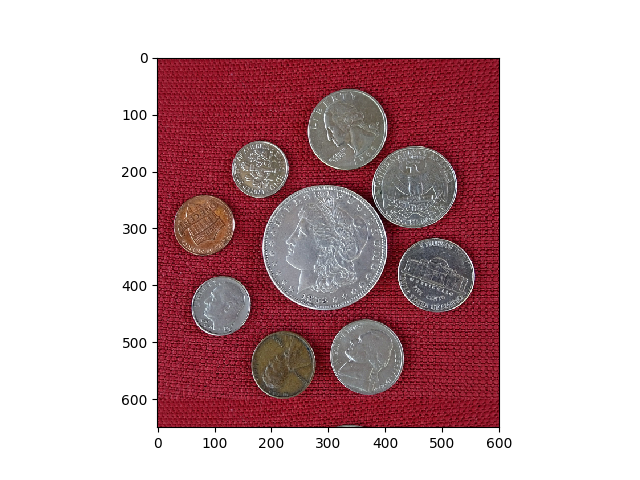

In [10]:
pltImg

## <font style = "color:rgb(50,120,229)">Step 2.1: Convert Image to Grayscale</font>

<font style = "color:rgb(255,70,0)">
Using OpenCV cvtColor(src_image, output_image, COLOR_BGR2GRAY) for this purpose.
</font>

In [11]:
// Convert image to grayscale
// Store it in the variable imageGray
///
/// YOUR CODE HERE
///
Mat imageGray;
cv::cvtColor(imageCopy, imageGray, cv::COLOR_BGR2GRAY);

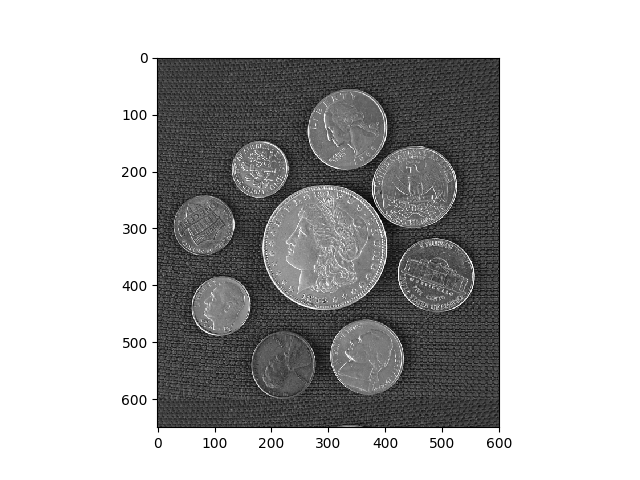

In [12]:
plt::figure();
plt::imshow(imageGray);
pltImg = displayImage(imageGray);
pltImg

## <font style = "color:rgb(50,120,229)">Step 2.2: Split Image into R,G,B Channels</font>

In [13]:
// Split cell into channels
// Store them in variables imageB, imageG, imageR
///
/// YOUR CODE HERE
///

// Splitting the 'image' into separate color channels and storing them in the 'channels' vector
std::vector<cv::Mat> channels;
cv::split(image, channels);

// Extracting each color channel from the channels vector and storing them to their respected vairables
cv::Mat imageB = channels[0];  // Blue channel
cv::Mat imageG = channels[1];  // Green channel
cv::Mat imageR = channels[2];  // Red channel

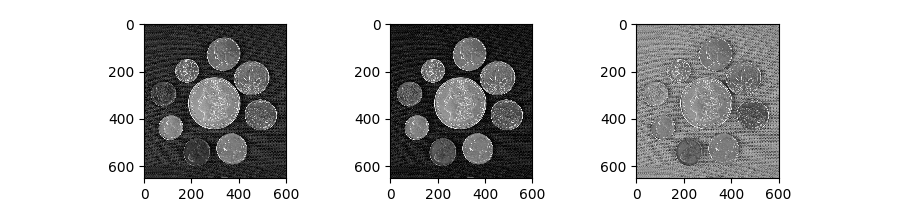

In [14]:
plt::figure_size(900,200);
plt::subplot(1,3,1);
plt::imshow(imageB);
pltImg = displayImage(imageB);
plt::subplot(1,3,2);
plt::imshow(imageG);
pltImg = displayImage(imageG);
plt::subplot(1,3,3);
plt::imshow(imageR);
pltImg = displayImage(imageR)

<font style = "color:rgb(255,70,0)">
Green is the most intensive channel followed by blue and red.</font>

## <font style = "color:rgb(50,120,229)">Step 3.1: Perform Thresholding</font>

You will have to carry out this step with different threshold values to see which one suits you the most. Do not remove those intermediate images and make sure to document your findings.

<font style = "color:rgb(255,70,0)">
I will use the OpenCV function threshold to perform thresholding. I will start applying THRESH_BINARY thresholding type.
</font>

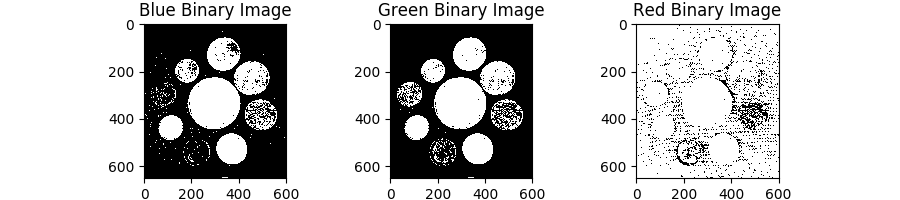

In [15]:
///
/// YOUR CODE HERE
///

//Using threshold functions with threshold value 90, maxvalue 255 and THRESH_BINARY,
//to then store them in variables binaryImgBlue, binaryImgGreen, binaryImgRed.
//Then I will plot each binary image using matplotlibcpp


Mat binaryImgBlue;
Mat binaryImgGreen;
Mat binaryImgRed;

threshold(imageB, binaryImgBlue, 90, 255, THRESH_BINARY);
threshold(imageG, binaryImgGreen, 90, 255, THRESH_BINARY);
threshold(imageR, binaryImgRed, 90, 255, THRESH_BINARY);


plt::figure_size(900,200);


plt::subplot(1,3,1);
plt::title("Blue Binary Image");
plt::imshow(binaryImgBlue);
pltImg = displayImage(binaryImgBlue);


plt::subplot(1,3,2);
plt::title("Green Binary Image");
plt::imshow(binaryImgGreen);
pltImg = displayImage(binaryImgGreen);


plt::subplot(1,3,3);
plt::title("Red Binary Image");
plt::imshow(binaryImgRed);
pltImg = displayImage(binaryImgRed);
pltImg






<font style = "color:rgb(255,70,0)">
THRESH_BINARY parameter the blobs pixels are set to the maximum pixel value 255. My obejctive is to change the blobs to minimum pixel value 0 I need.  I can use openCV bitwise operation or change the THRESH_BINARY_INV in the threshold parameters.

</font>

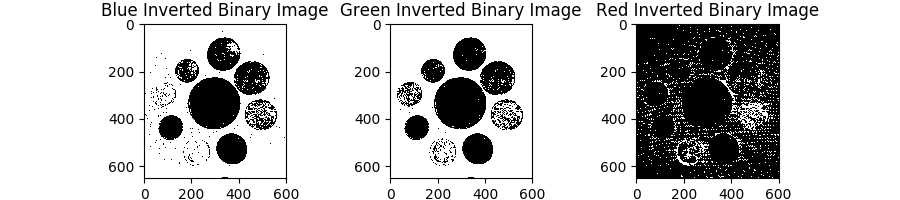

In [16]:
//Using threshold functions with threshold value 90, maxvalue 255 and THRESH_BINARY_INV,
//to then store them in variables invBinaryImgBlue, invBinaryImgGreen, invBinaryImgRed.
//Then plotting each inverted binary image using matplotlibcpp


Mat invBinaryImgBlue;
Mat invBinaryImgGreen;
Mat invBinaryImgRed;

threshold(imageB, invBinaryImgBlue, 90, 255, THRESH_BINARY_INV);
threshold(imageG, invBinaryImgGreen, 90, 255, THRESH_BINARY_INV);
threshold(imageR, invBinaryImgRed, 90, 255, THRESH_BINARY_INV);


plt::figure_size(900,200);


plt::subplot(1,3,1);
plt::title("Blue Inverted Binary Image");
plt::imshow(invBinaryImgBlue);
pltImg = displayImage(invBinaryImgBlue);


plt::subplot(1,3,2);
plt::title("Green Inverted Binary Image");
plt::imshow(invBinaryImgGreen);
pltImg = displayImage(invBinaryImgGreen);


plt::subplot(1,3,3);
plt::title("Red Inverted Binary Image");
plt::imshow(invBinaryImgRed);
pltImg = displayImage(invBinaryImgRed);
pltImg

<font style = "color:rgb(255,70,0)">

Red channel is less optimal to work with. processing and green channel is till the optimal. Further experimentation by changing the threshold value wil be conducted to get rid of the white speckles inside the blobs while keeping all 10 blobs. 

</font>

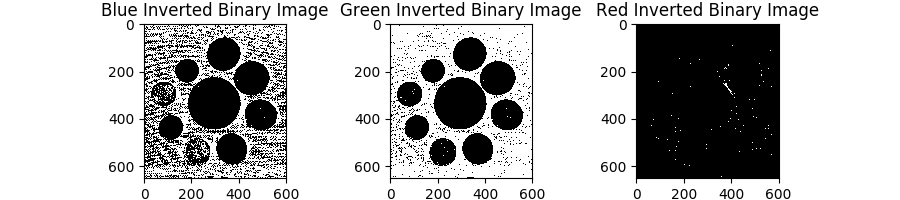

In [17]:
//Changing the inputs in the threshold function with threshold values to 50 and max value to 255.
// Then plotting each inverted binary image using matplotlibcpp

threshold(imageB, invBinaryImgBlue, 50, 255, THRESH_BINARY_INV);
threshold(imageG, invBinaryImgGreen, 50, 255, THRESH_BINARY_INV);
threshold(imageR, invBinaryImgRed, 50, 255, THRESH_BINARY_INV);


plt::figure_size(900,200);


plt::subplot(1,3,1);
plt::title("Blue Inverted Binary Image");
plt::imshow(invBinaryImgBlue);
pltImg = displayImage(invBinaryImgBlue);


plt::subplot(1,3,2);
plt::title("Green Inverted Binary Image");
plt::imshow(invBinaryImgGreen);
pltImg = displayImage(invBinaryImgGreen);


plt::subplot(1,3,3);
plt::title("Red Inverted Binary Image");
plt::imshow(invBinaryImgRed);
pltImg = displayImage(invBinaryImgRed);
pltImg

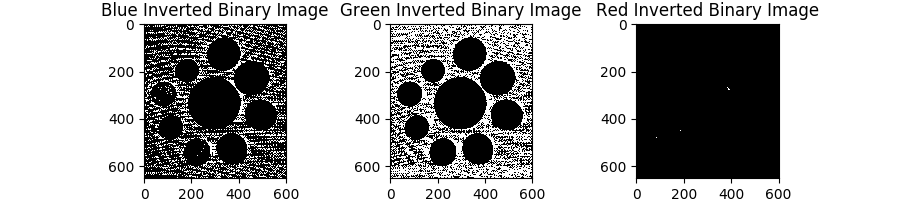

In [18]:
//Changing the inputs in the threshold function with threshold values to 30 and max value to 255.
// Then plotting each inverted binary image using matplotlibcpp

threshold(imageB, invBinaryImgBlue, 30, 255, THRESH_BINARY_INV);
threshold(imageG, invBinaryImgGreen, 30, 255, THRESH_BINARY_INV);
threshold(imageR, invBinaryImgRed, 30, 255, THRESH_BINARY_INV);


plt::figure_size(900,200);


plt::subplot(1,3,1);
plt::title("Blue Inverted Binary Image");
plt::imshow(invBinaryImgBlue);
pltImg = displayImage(invBinaryImgBlue);


plt::subplot(1,3,2);
plt::title("Green Inverted Binary Image");
plt::imshow(invBinaryImgGreen);
pltImg = displayImage(invBinaryImgGreen);


plt::subplot(1,3,3);
plt::title("Red Inverted Binary Image");
plt::imshow(invBinaryImgRed);
pltImg = displayImage(invBinaryImgRed);
pltImg

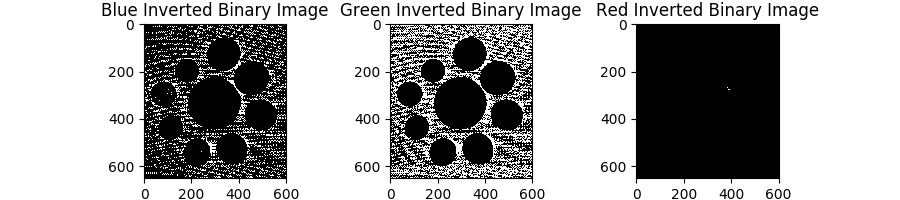

In [19]:
//Changing the inputs in the threshold function with threshold values to 24 and max value to 255.
// Then plotting each inverted binary image using matplotlibcpp

threshold(imageB, invBinaryImgBlue, 24, 255, THRESH_BINARY_INV);
threshold(imageG, invBinaryImgGreen, 24, 255, THRESH_BINARY_INV);
threshold(imageR, invBinaryImgRed, 24, 255, THRESH_BINARY_INV);


plt::figure_size(900,200);


plt::subplot(1,3,1);
plt::title("Blue Inverted Binary Image");
plt::imshow(invBinaryImgBlue);
pltImg = displayImage(invBinaryImgBlue);


plt::subplot(1,3,2);
plt::title("Green Inverted Binary Image");
plt::imshow(invBinaryImgGreen);
pltImg = displayImage(invBinaryImgGreen);


plt::subplot(1,3,3);
plt::title("Red Inverted Binary Image");
plt::imshow(invBinaryImgRed);
pltImg = displayImage(invBinaryImgRed);
pltImg

In [20]:
// Saving the invBinaryImgGreen to dst matrix variable
Mat dst = invBinaryImgGreen.clone();

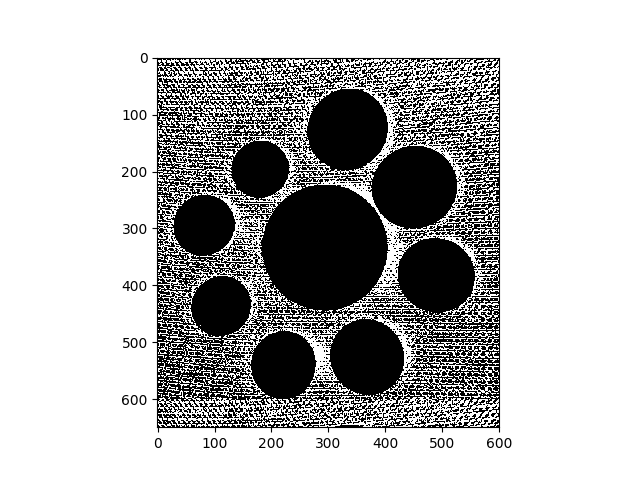

In [21]:
// Display image using matplotlibcpp
// We have provided the sample code here
// Please modify it as required
plt::figure();
plt::imshow(dst);
pltImg = displayImage(dst);
pltImg

## <font style = "color:rgb(50,120,229)">Step 3.2: Perform morphological operations</font>

You will have to carry out this step with different kernel size, kernel shape and morphological operations to see which one (or more) suits you the most. Do not remove those intermediate images and make sure to document your findings.

<font style = "color:rgb(255,70,0)">
In this step, I'll modify the 'dst' image by expanding its features using a rectangular structure. I'll tweak various parameters, experimenting with the getStructuringElement function to achieve the desired outcome. Here's what I'll do:

<li> Adjust the kernel size to determine the structure's size.</li>
<li>Experiment with three different elements: MORPH_RECT, MORPH_ELLIPSE, and MORPH_CROSS.</li>
<li>Create an empty 'Mat' matrix called 'imageMorph' to store the result of the operation.</li>
<li>Save the modified image as 'dst1' after each operation, then 'dst2' for the second iteration, and so on.
Display the 'dst[i]' output after each iteration.</li>
<p>I'll start with an MORPH_ELLIPSE-shaped element with a kernel size of 1 and gradually increase the kernel size. The image below illustrates how the kernel size affects the shape. Note that MORPH_RECT is not shown in the example, as it produces a simple rectangular structure with rows and columns equal to 1, resulting in white squares of various sizes.

</font>

## <font color = Black>
 MORPH_RECT
</font>

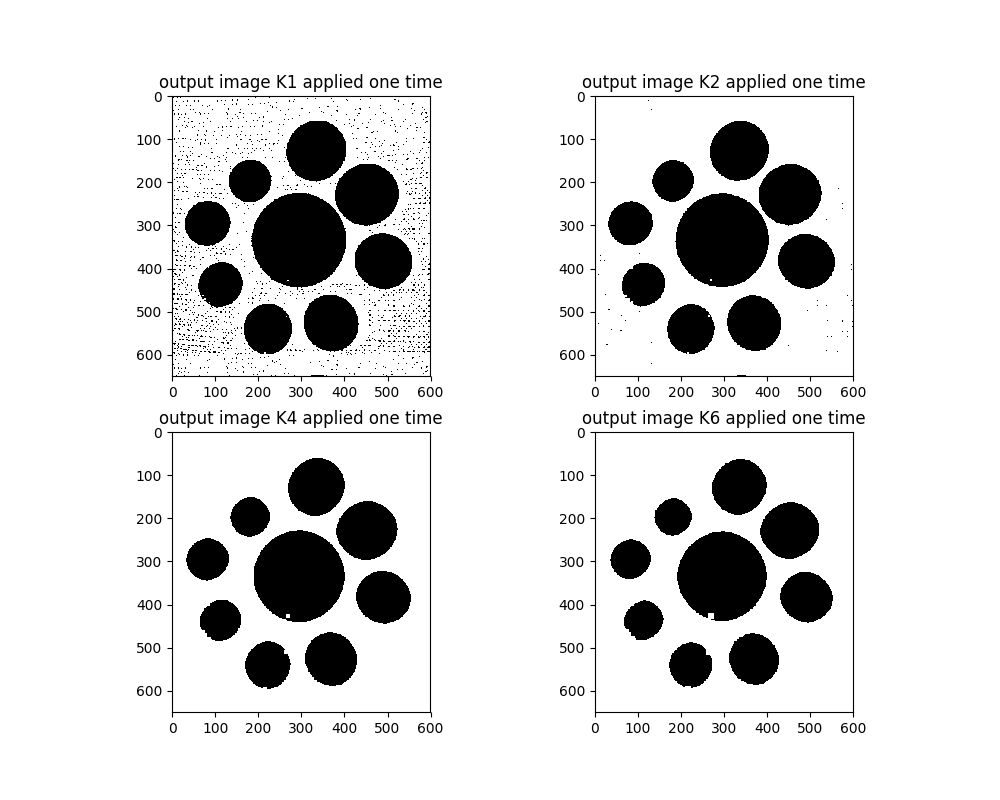

In [22]:
///
/// YOUR CODE HERE
///

// Define the size of the kernel 1  for dilation
int kernelSize = 1;
Mat element = cv::getStructuringElement(MORPH_RECT, Size(2 * kernelSize + 1, 2 * kernelSize + 1),
                                        Point(kernelSize, kernelSize));
Mat morphImage;
dilate(dst, morphImage, element, cv::Point(-1, -1), 1);
Mat dst1 = morphImage.clone();

//-------------------------------------------------------------//

// Define the size of the kernel 2  for dilation
kernelSize = 2;
 element = cv::getStructuringElement(MORPH_RECT, Size(2 * kernelSize + 1, 2 * kernelSize + 1),
                                        Point(kernelSize, kernelSize));
 morphImage;
dilate(dst, morphImage, element, cv::Point(-1, -1), 1);
Mat dst2 = morphImage.clone();

//-------------------------------------------------------------//

// Define the size of the kernel 4  for dilation
kernelSize = 4;
  element = cv::getStructuringElement(MORPH_RECT, Size(2 * kernelSize + 1, 2 * kernelSize + 1),
                                        Point(kernelSize, kernelSize));
 morphImage;
dilate(dst, morphImage, element, cv::Point(-1, -1), 1);
Mat dst3 = morphImage.clone();

//-------------------------------------------------------------//

// Define the size of the kernel 6  for dilation
kernelSize = 6;
  element = cv::getStructuringElement(MORPH_RECT, Size(2 * kernelSize + 1, 2 * kernelSize + 1),
                                        Point(kernelSize, kernelSize));
 morphImage;
dilate(dst, morphImage, element, cv::Point(-1, -1), 1);
Mat dst4 = morphImage.clone();


//-------------------------------------------------------------//


// Displaying the output images
plt::figure_size(1000,800);

plt::subplot(2,2,1);
plt::title("output image K1 applied one time");
plt::imshow(dst1);
pltImg = displayImage(dst1);

plt::subplot(2,2,2);
plt::title("output image K2 applied one time");
plt::imshow(dst2);
pltImg = displayImage(dst2);

plt::subplot(2,2,3);
plt::title("output image K4 applied one time");
plt::imshow(dst3);
pltImg = displayImage(dst3);

plt::subplot(2,2,4);
plt::title("output image K6 applied one time");
plt::imshow(dst4);
pltImg = displayImage(dst4);

pltImg

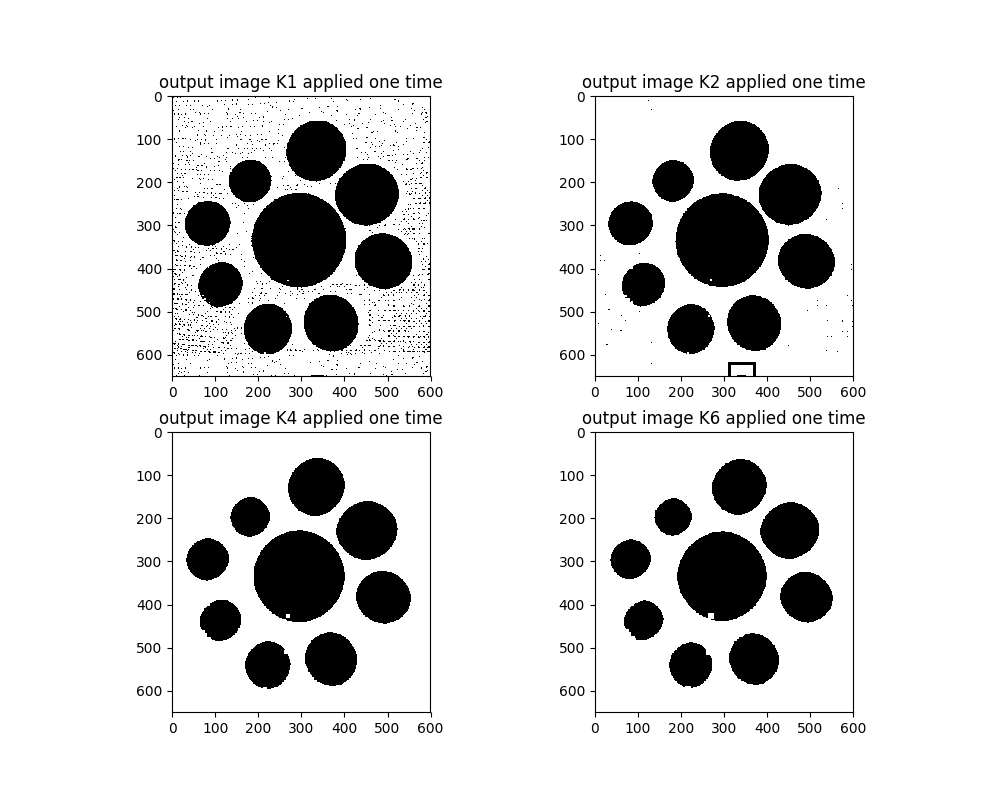

In [23]:
// Displaying the output images
// Draw a rectangle (thickness is a positive integer)
Mat imageRectangle = dst2.clone();
rectangle(imageRectangle, Point(310, 620), Point(370, 660), 
          Scalar(0, 0, 0), 5, LINE_8);


plt::figure_size(1000,800);

plt::subplot(2,2,1);
plt::title("output image K1 applied one time");
plt::imshow(dst1);
pltImg = displayImage(dst1);

plt::subplot(2,2,2);
plt::title("output image K2 applied one time");
plt::imshow(imageRectangle);
pltImg = displayImage(imageRectangle);

plt::subplot(2,2,3);
plt::title("output image K4 applied one time");
plt::imshow(dst3);
pltImg = displayImage(dst3);

plt::subplot(2,2,4);
plt::title("output image K6 applied one time");
plt::imshow(dst4);
pltImg = displayImage(dst4);

pltImg

## <font color = Black>
 MORPH_ELLIPSE
</font>

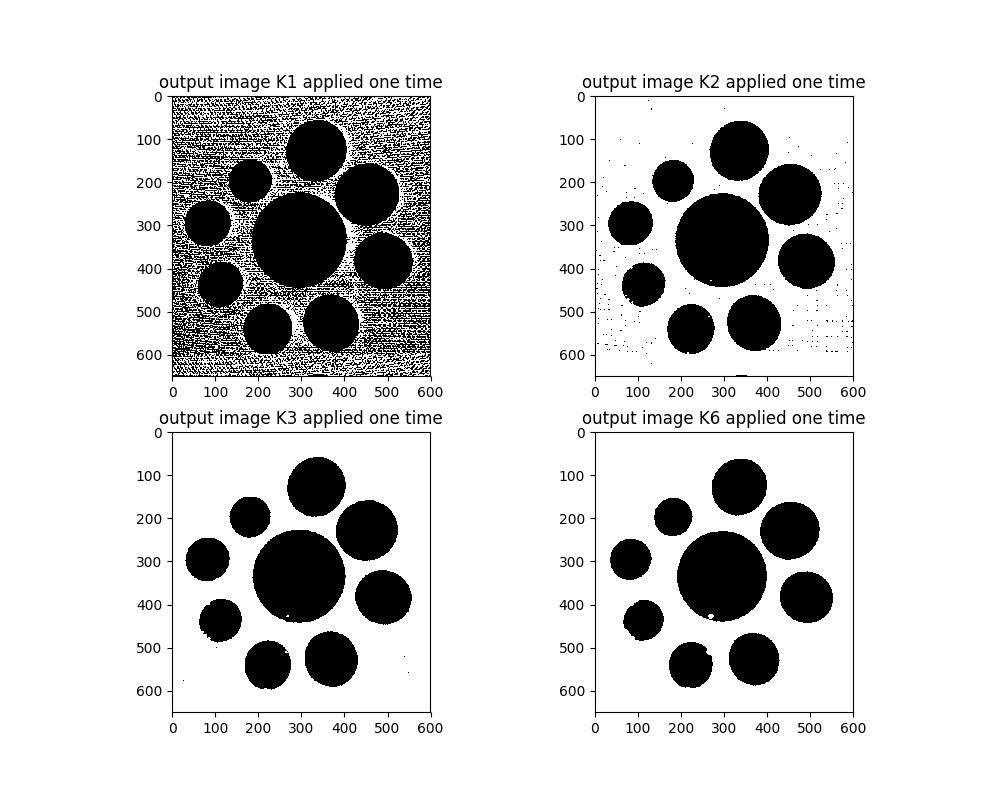

In [24]:
// Saving the invBinaryImgGreen to dst matrix variable
dst = invBinaryImgGreen.clone();



// Define the size of the kernel 1  for dilation
 kernelSize = 1;
 element = cv::getStructuringElement(MORPH_ELLIPSE, Size(2 * kernelSize + 1, 2 * kernelSize + 1),
                                        Point(kernelSize, kernelSize));
morphImage;
dilate(dst, morphImage, element, cv::Point(-1, -1), 1);
 dst1 = morphImage.clone();

//-------------------------------------------------------------//

// Define the size of the kernel 2  for dilation
kernelSize = 2;
 element = cv::getStructuringElement(MORPH_ELLIPSE, Size(2 * kernelSize + 1, 2 * kernelSize + 1),
                                        Point(kernelSize, kernelSize));
 morphImage;
dilate(dst, morphImage, element, cv::Point(-1, -1), 1);
dst2 = morphImage.clone();

//-------------------------------------------------------------//

// Define the size of the kernel 4  for dilation
kernelSize = 3;
  element = cv::getStructuringElement(MORPH_ELLIPSE, Size(2 * kernelSize + 1, 2 * kernelSize + 1),
                                        Point(kernelSize, kernelSize));
 morphImage;
dilate(dst, morphImage, element, cv::Point(-1, -1), 1);
 dst3 = morphImage.clone();

//-------------------------------------------------------------//

// Define the size of the kernel 6  for dilation
kernelSize = 6;
  element = cv::getStructuringElement(MORPH_ELLIPSE, Size(2 * kernelSize + 1, 2 * kernelSize + 1),
                                        Point(kernelSize, kernelSize));
 morphImage;
dilate(dst, morphImage, element, cv::Point(-1, -1), 1);
 dst4 = morphImage.clone();


//-------------------------------------------------------------//


// Displaying the output image 'dst1'
plt::figure_size(1000,800);

plt::subplot(2,2,1);
plt::title("output image K1 applied one time");
plt::imshow(dst);
pltImg = displayImage(dst);

plt::subplot(2,2,2);
plt::title("output image K2 applied one time");
plt::imshow(dst2);
pltImg = displayImage(dst2);

plt::subplot(2,2,3);
plt::title("output image K3 applied one time");
plt::imshow(dst3);
pltImg = displayImage(dst3);

plt::subplot(2,2,4);
plt::title("output image K6 applied one time");
plt::imshow(dst4);
pltImg = displayImage(dst4);

pltImg


## <font color = Black>
 MORPH_CROSS
</font>

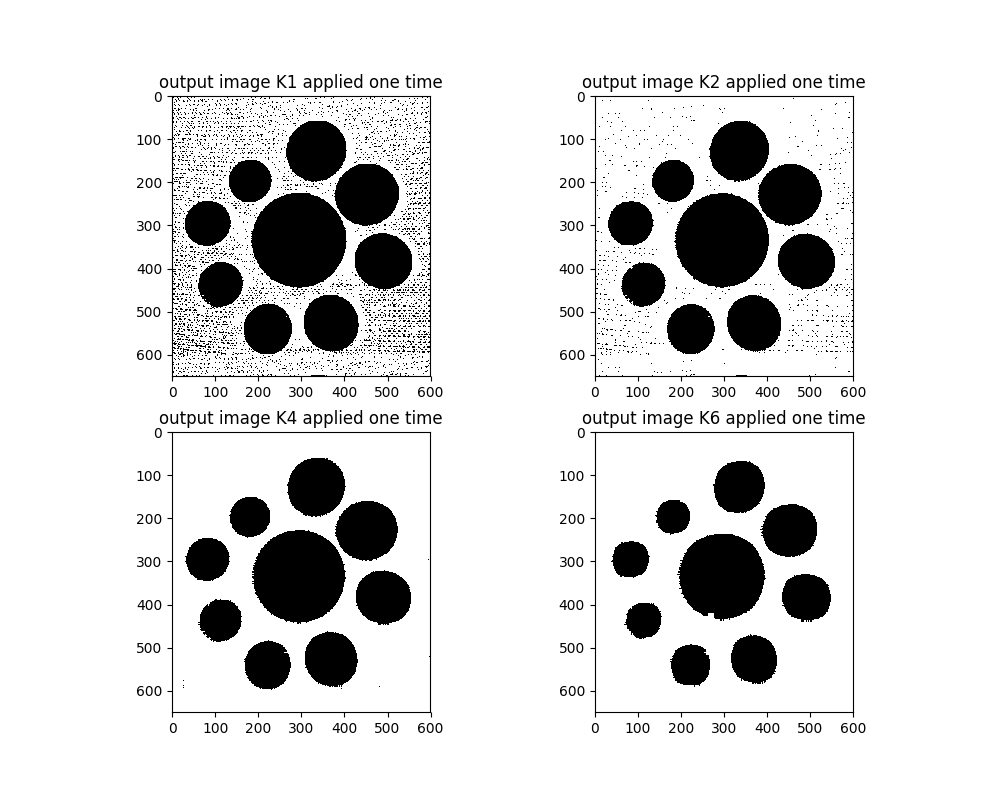

In [25]:
// Define the size of the kernel 1  for dilation
dst = invBinaryImgGreen.clone();

 kernelSize = 1;
 element = cv::getStructuringElement(MORPH_CROSS, Size(2 * kernelSize + 1, 2 * kernelSize + 1),
                                        Point(kernelSize, kernelSize));
morphImage;
dilate(dst, morphImage, element, cv::Point(-1, -1), 1);
 dst1 = morphImage.clone();

//-------------------------------------------------------------//

// Define the size of the kernel 2  for dilation
kernelSize = 2;
 element = cv::getStructuringElement(MORPH_CROSS, Size(2 * kernelSize + 1, 2 * kernelSize + 1),
                                        Point(kernelSize, kernelSize));
 morphImage;
dilate(dst, morphImage, element, cv::Point(-1, -1), 1);
dst2 = morphImage.clone();

//-------------------------------------------------------------//

// Define the size of the kernel 4  for dilation
kernelSize = 4;
  element = cv::getStructuringElement(MORPH_CROSS, Size(2 * kernelSize + 1, 2 * kernelSize + 1),
                                        Point(kernelSize, kernelSize));
 morphImage;
dilate(dst, morphImage, element, cv::Point(-1, -1), 1);
 dst3 = morphImage.clone();

//-------------------------------------------------------------//

// Define the size of the kernel 6  for dilation
kernelSize = 6;
  element = cv::getStructuringElement(MORPH_CROSS, Size(2 * kernelSize + 1, 2 * kernelSize + 1),
                                        Point(kernelSize, kernelSize));
 morphImage;
dilate(dst, morphImage, element, cv::Point(-1, -1), 2);
 dst4 = morphImage.clone();


//-------------------------------------------------------------//


// Displaying the output image 'dst1'
plt::figure_size(1000,800);

plt::subplot(2,2,1);
plt::title("output image K1 applied one time");
plt::imshow(dst1);
pltImg = displayImage(dst1);

plt::subplot(2,2,2);
plt::title("output image K2 applied one time");
plt::imshow(dst2);
pltImg = displayImage(dst2);

plt::subplot(2,2,3);
plt::title("output image K4 applied one time");
plt::imshow(dst3);
pltImg = displayImage(dst3);

plt::subplot(2,2,4);
plt::title("output image K6 applied one time");
plt::imshow(dst4);
pltImg = displayImage(dst4);

pltImg


<font style = "color:rgb(255,70,0)">

MORPH_CROSS score the lowest in the benchmarking. Next will be experimentaiton with MORPH_RECT</font>

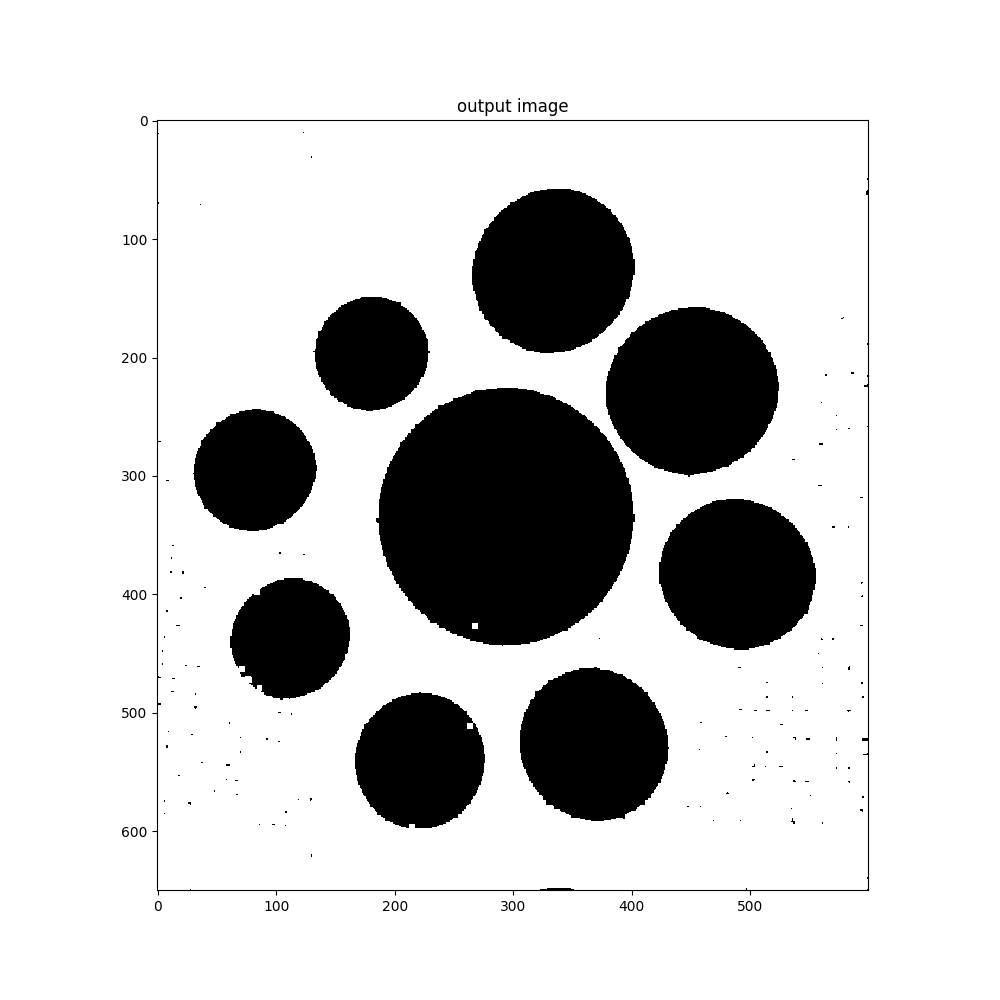

In [26]:
dst = invBinaryImgGreen.clone();

// Define the size of the kernel 2  for dilation
kernelSize = 2;
 element = cv::getStructuringElement(MORPH_RECT, Size(2 * kernelSize + 1, 2 * kernelSize + 1),
                                        Point(kernelSize, kernelSize));
   
morphImage;
dilate(dst, morphImage, element, cv::Point(-1, -1), 1);


plt::figure_size(1000,1000);
plt::title("output image");
plt::imshow(morphImage);
pltImg = displayImage(morphImage);
pltImg

<font style = "color:rgb(255,70,0)">

Now iterating with different parameters and emperimentig with erosion and dilation to remove noise and to represent all 10 blobs'.</font>

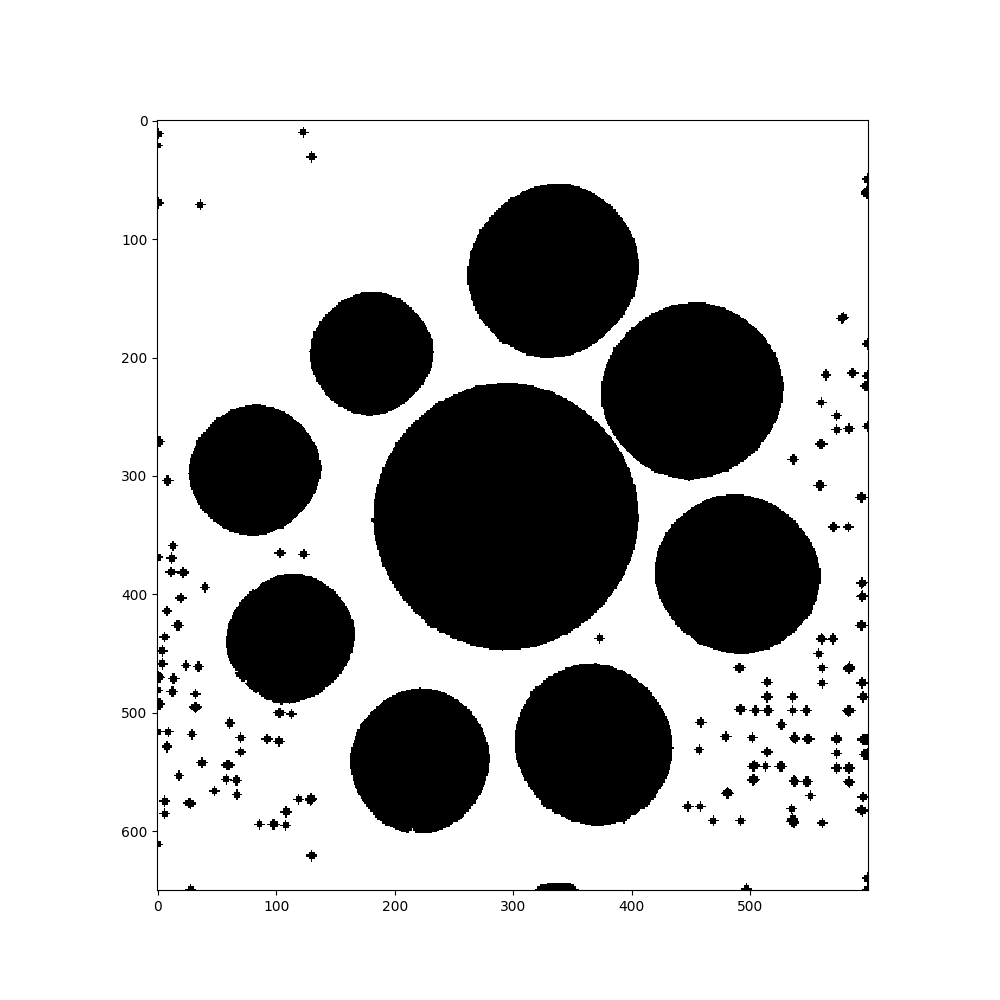

In [27]:
// Now Erosion to increase the size of the blobs
dst = morphImage.clone();

kernelSize = 2;
element = getStructuringElement(MORPH_CROSS, Size(2*kernelSize+1, 2*kernelSize+1),
                                    Point(kernelSize, kernelSize));
Mat imageEroded;
erode(dst,imageEroded , element, Point(-1,-1),2);

dst2 = imageEroded.clone();

plt::figure_size(1000,1000);
plt::imshow(dst2);
pltImg = displayImage(dst2);
pltImg

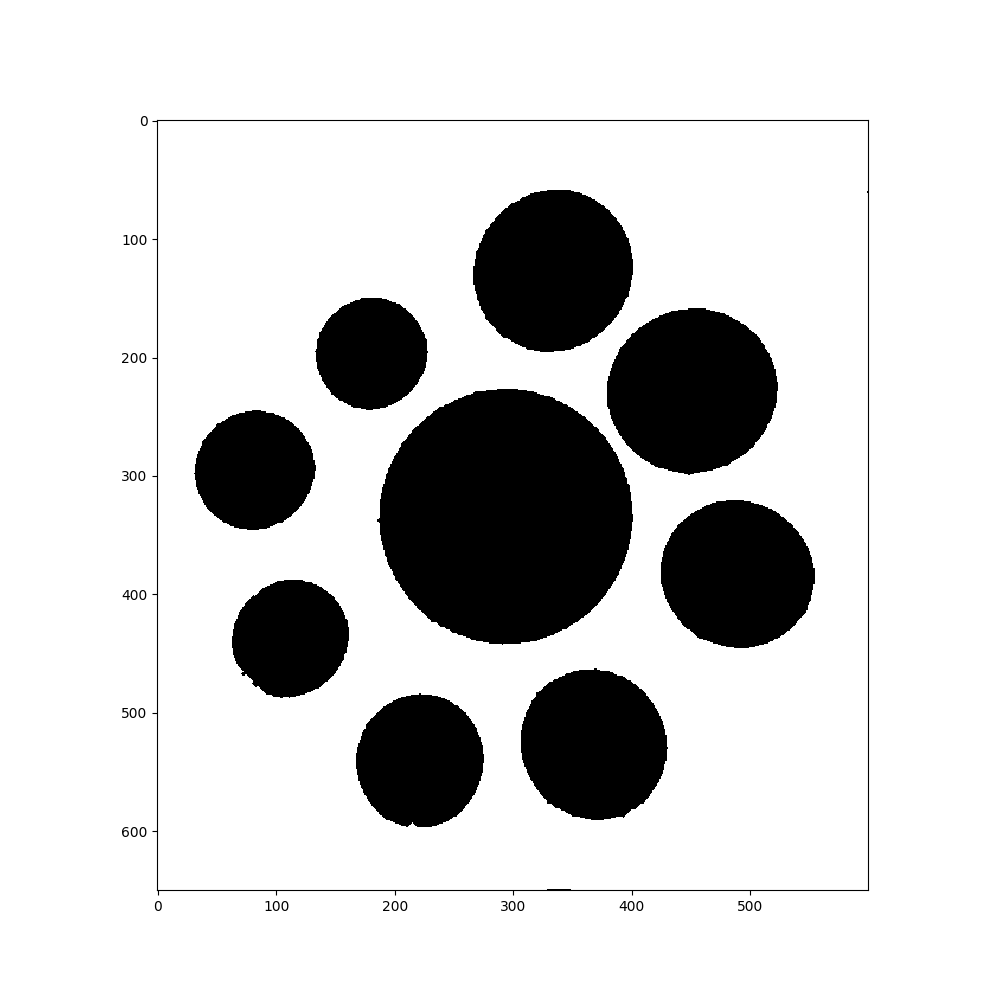

In [28]:
// Now Erosion to increase the size of the blobs

dst = dst2.clone();

kernelSize = 1;
element = getStructuringElement(MORPH_CROSS, Size(2*kernelSize+1, 2*kernelSize+1),
                                    Point(kernelSize, kernelSize));
imageEroded;
dilate(dst2,imageEroded , element, Point(-1,-1),5);

dst3 = imageEroded.clone();

plt::figure_size(1000,1000);
plt::imshow(dst3);
pltImg = displayImage(dst3);
pltImg

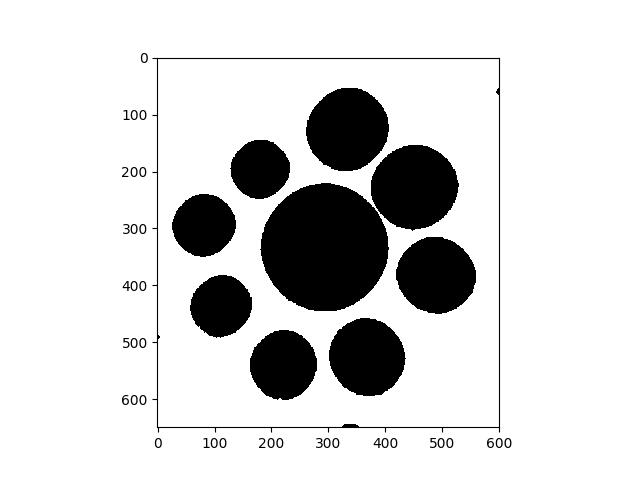

In [29]:
// Now Erosion to increase the size of the blobs
dst = dst3.clone();

kernelSize = 1;
element = getStructuringElement(MORPH_ELLIPSE, Size(2*kernelSize+1, 2*kernelSize+1),
                                    Point(kernelSize, kernelSize));
imageEroded;
erode(dst,imageEroded , element, Point(-1,-1),5);

dst4 = imageEroded.clone();

plt::figure();
plt::imshow(dst4);
pltImg = displayImage(dst4);
pltImg

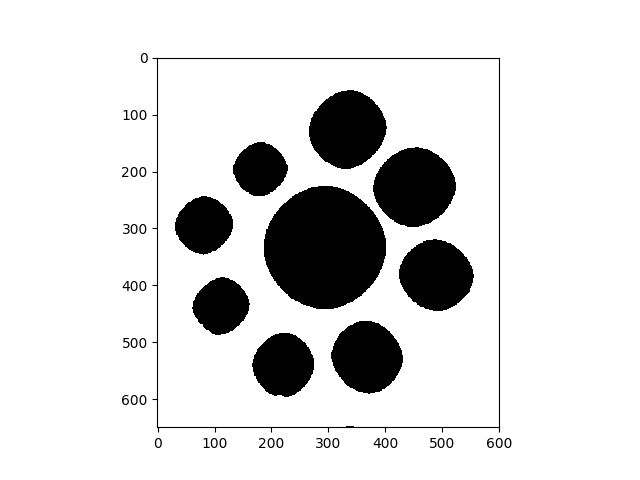

In [30]:
dst = dst4.clone();

kernelSize = 1;
element = getStructuringElement(MORPH_RECT, Size(2*kernelSize+1, 2*kernelSize+1),
                                    Point(kernelSize, kernelSize));
imageEroded;
dilate(dst,imageEroded , element, Point(-1,-1),4);

Mat dst5 = imageEroded.clone();

plt::figure();
plt::imshow(dst5);
pltImg = displayImage(dst5);
pltImg

<font style = "color:rgb(255,70,0)">

Keep iterating with MORPH_RECT will remove the smallest blob. Also the blobs become les cirular. Next step I will erode with MORPH_ELLIPSE to solve this issue.


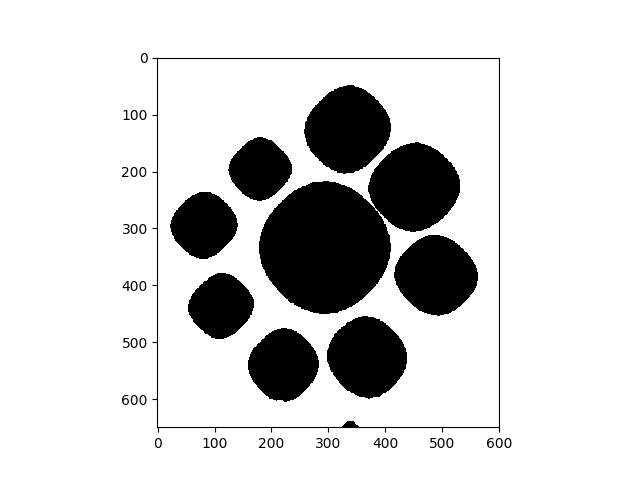

In [31]:
dst = dst5.clone();

kernelSize = 1;
element = getStructuringElement(MORPH_ELLIPSE, Size(2*kernelSize+1, 2*kernelSize+1),
                                    Point(kernelSize, kernelSize));
imageEroded;
erode(dst,imageEroded , element, Point(-1,-1),8);

Mat dst6 = imageEroded.clone();

plt::figure();
plt::imshow(dst6);
pltImg = displayImage(dst6);
pltImg

<font style = "color:rgb(255,70,0)">

This could work. but the blobas all have a diamond shape instead of cirles.


</font>

**Display all the images you have obtained in the intermediate steps**

![](../results/dilated-A.png)

<font style = "color:rgb(255,70,0)">

I will use experiement again with parameters and keep MORPH_ELLIPSE for both Dilation and Erosion to achieve to the becnhmarked image
</font>

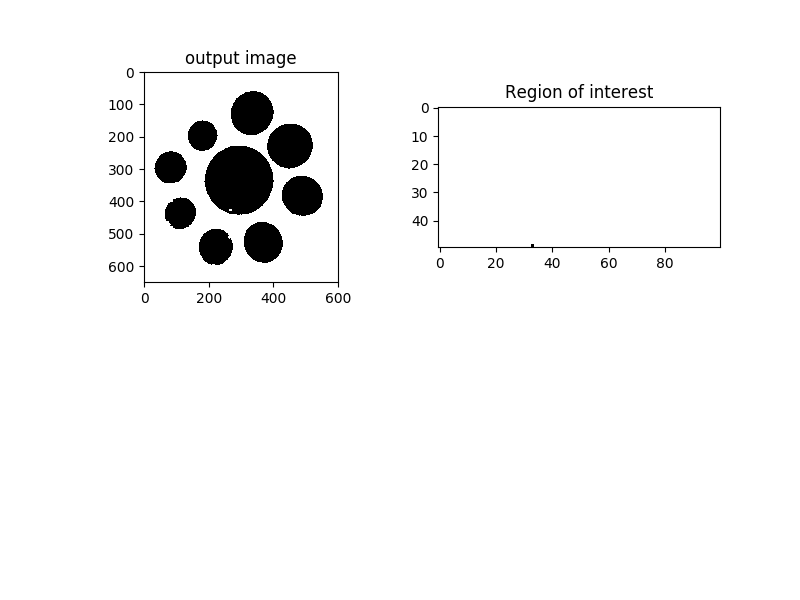

In [32]:
// Get structuring element/kernel which will be used for dilation
///
/// YOUR CODE HERE
///

dst = invBinaryImgGreen.clone();

// Define the size of the kernel 2  for dilation
kernelSize = 2;
 element = cv::getStructuringElement(MORPH_ELLIPSE, Size(2 * kernelSize + 1, 2 * kernelSize + 1),
                                        Point(kernelSize, kernelSize));
 morphImage;
dilate(dst, morphImage, element, cv::Point(-1, -1), 2);
dst1 = morphImage.clone();


Mat crop = dst1(Range(600,650),Range(300,400));


plt::figure_size(800,600);
plt::subplot(2,2,1);
plt::title("output image");
plt::imshow(dst1);
pltImg = displayImage(dst1);

plt::subplot(2,2,2);
plt::title("Region of interest");
plt::imshow(crop);
pltImg = displayImage(crop);
pltImg




<font style = "color:rgb(255,70,0)">

By getting the region of intereset we see see the tiny lonely blob'. This is great bevcause now I can go further with erosion to increase the the blob size and to make all blobls visible for further coint detection process.

</font>

In [33]:
///
/// YOUR CODE HERE
///

dst = dst1.clone();

// Define the size of the kernel 2  for dilation
kernelSize = 1;
 element = cv::getStructuringElement(MORPH_ELLIPSE, Size(2 * kernelSize + 1, 2 * kernelSize + 1),
                                        Point(kernelSize, kernelSize));
 morphImage;
erode(dst1, morphImage, element, cv::Point(-1, -1), 5);
imageEroded = morphImage.clone();


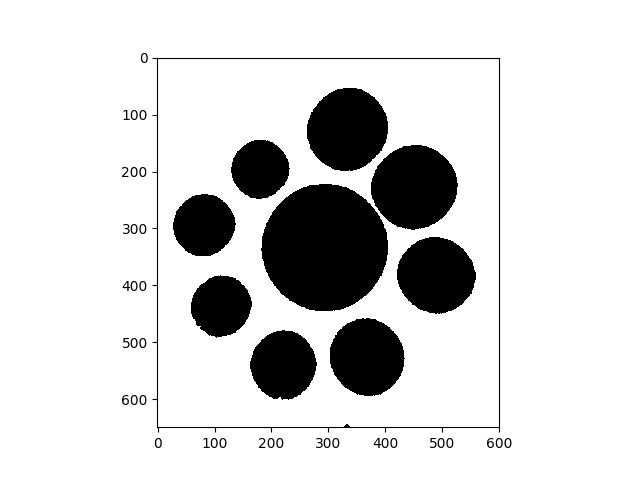

In [34]:
// Display image using matplotlibcpp
// We have provided the sample code here
// Please modify it as required
plt::figure();
plt::imshow(imageEroded);
pltImg = displayImage(imageEroded);
pltImg

## <font style = "color:rgb(50,120,229)">Step 4.1: Create SimpleBlobDetector</font>

In [35]:
// Setup SimpleBlobDetector parameters.
SimpleBlobDetector::Params params;

params.blobColor = 0;

params.minDistBetweenBlobs = 2;

// Filter by Area
params.filterByArea = false;

// Filter by Circularity
params.filterByCircularity = true;
params.minCircularity = 0.8;

// Filter by Convexity
params.filterByConvexity = true;
params.minConvexity = 0.8;

// Filter by Inertia
params.filterByInertia = true;
params.minInertiaRatio = 0.8;

In [36]:
// Set up detector with params
Ptr<SimpleBlobDetector> detector = SimpleBlobDetector::create(params);

## <font style = "color:rgb(50,120,229)">Step 4.2: Detect Coins</font>

### <font style = "color:rgb(8,133,37)">Hints</font>
Use **`detector->detect(image,keypoints)`** to detect the blobs (coins). The output of the function is a list of **keypoints** where each keypoint is unique for each blob.

Print the number of coins detected as well.

In [37]:
// Detect blobs
///
/// YOUR CODE HERE
///


// Declaring a vector of KeyPoint objects named 'keypoints'.
std::vector<KeyPoint> keypoints;

// Calling a 'detect' function on an object named 'detector'.
// It passes in the 'imageEroded' as input and stores the detected keypoints in the 'keypoints' vector.
detector->detect(imageEroded, keypoints);

In [38]:
// Print number of coins detected
///
/// YOUR CODE HERE
///

// Printing out the coins / keypoints detected
cout << "Number of coins detected = "<< keypoints.size() << endl;

Number of coins detected = 9


**Note that we were able to detect all the 9 coins. So that's your benchmark.**

## <font style = "color:rgb(50,120,229)">Step 4.3: Display the detected coins on original image</font>

Make sure to mark the center of the blobs as well. **Use only the functions discussed in Image Annotation section in Week 1**

### <font style = "color:rgb(8,133,37)">Hints</font>
You can extract the coordinates of the center and the diameter of a blob using **`k.pt`** and **`k.size`** where `k` is a keypoint.

<font style = "color:rgb(255,70,0)">

Using COLORMAP_TWILIGHT_SHIFTED to make the background blue instead of red.

</font>

In [39]:
// Mark coins using image annotation concepts we have studied so far
int x,y;
int radius;
double diameter;
///
/// YOUR CODE HERE
///

Mat imColorMap;
// Create an 'imColorMap' to apply a color map effect to the 'image'
applyColorMap(image, imColorMap, COLORMAP_TWILIGHT_SHIFTED);

// Clone the color-mapped image into the 'image' variable
image = imColorMap.clone();

// Iterate through keypoints in a list
for (int i = 0; i < keypoints.size(); i++) {
    KeyPoint k = keypoints[i];
    Point keyPt;
    keyPt = k.pt;
    int x = (int)keyPt.x;
    int y = (int)keyPt.y;
    
    // Mark the center of the keypoint in BLACK
    circle(image, Point(x, y), 5, Scalar(255, 0, 0), -1);
    
    // Get the radius of a coin (diameter divided by 2)
    diameter = k.size;
    int radius = (int)diameter / 2.0;
    
    // Mark the blob (keypoint) in GREEN
    circle(image, Point(x, y), radius, Scalar(0, 255, 0), 3);
}


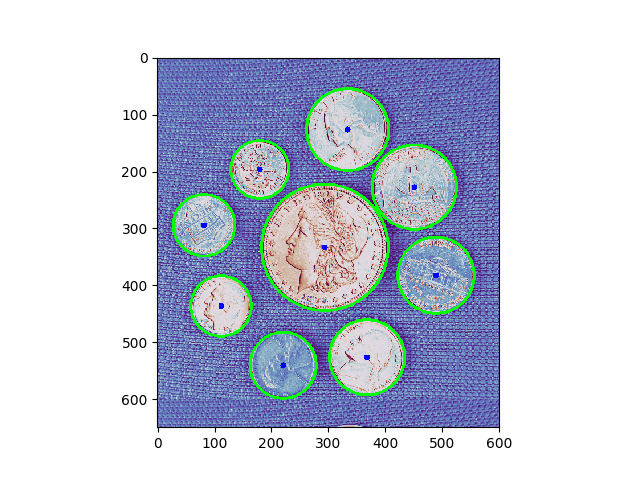

In [40]:
// Display image using matplotlibcpp
// We have provided the sample code here
// Please modify it as required

plt::figure();
plt::imshow(image);
pltImg = displayImage(image);
pltImg

## <font style = "color:rgb(50,120,229)">Step 4.4: Perform Connected Component Analysis</font>

In the final step, perform Connected Component Analysis (CCA) on the binary image to find out the number of connected components. Do you think we can use CCA to calculate number of coins? Why/why not?

In [41]:
Mat displayConnectedComponents(Mat &im)
{
 // Make a copy of the image
 Mat imLabels = im.clone();

 // First let's find the min and max values in imLabels
 Point minLoc, maxLoc;
 double min, max;

 // The following line finds the min and max pixel values
 // and their locations in an image.
 minMaxLoc(imLabels, &min, &max, &minLoc, &maxLoc);
 
 // Normalize the image so the min value is 0 and max value is 255.
 imLabels = 255 * (imLabels - min) / (max - min);
 
 // Convert image to 8-bits
 imLabels.convertTo(imLabels, CV_8U);
 
 // Apply a color map
 Mat imColorMap;
 applyColorMap(imLabels, imColorMap, COLORMAP_JET);

 return imColorMap;
}

In [42]:
// Find connected components
// Use displayConnectedComponents function provided above
///
/// YOUR CODE HERE
///


// Find connected components
Mat imLabels;
connectedComponents(imageEroded, imLabels);
Mat colorMap = displayConnectedComponents(imLabels)

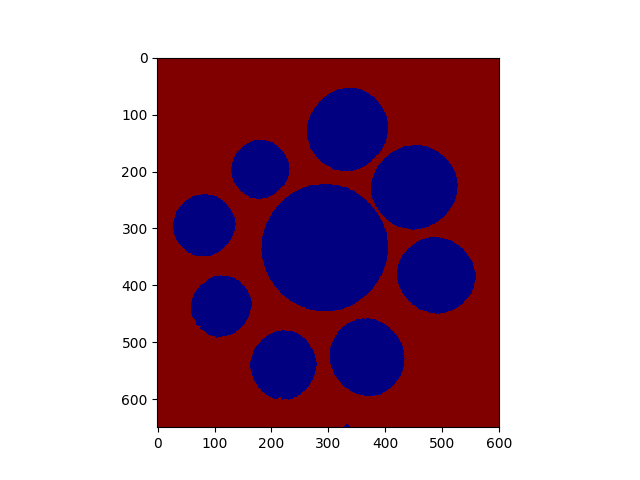

In [43]:
plt::figure();
plt::imshow(colorMap);
pltImg = displayImage(colorMap);
pltImg

<font style = "color:rgb(255,70,0)">
Connected components show a connection only in repsect to the background. In order to solve this issue, a threshold or a bitwise operation is needed. 

</font>

In [44]:
Mat invertedImage;
bitwise_not(imageEroded, invertedImage);

imLabels;
connectedComponents(invertedImage, imLabels);
colorMap = displayConnectedComponents(imLabels)

@0x7fc1bc00acc8

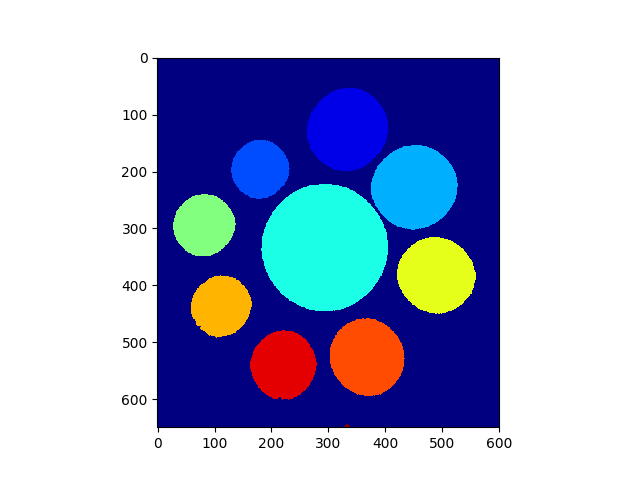

In [45]:
// Display image using matplotlibcpp
// We have provided the sample code here
// Please modify it as required
plt::figure();
plt::imshow(colorMap);
pltImg = displayImage(colorMap);
pltImg

## <font style = "color:rgb(50,120,229)">Step 4.5: Detect coins using Contour Detection</font>

In the final step, perform Contour Detection on the binary image to find out the number of coins.

<font style = "color:rgb(255,70,0)">
I'll use the OpenCV findContours function for contour detection. To do this, I'll create two essential variables:

<li>'contours': This vector will hold the detected contours from the image.
<li>'hierarchy': Another vector will store the hierarchical relationships among these contours.

</font>

In [46]:
// Find all contours in the image
///
/// YOUR CODE HERE
///

// Declaring variable name contours --> 
//a vector (array) of vector pointsof points.
vector<vector<Point> > contours;

//  Vector or an array, that can store four integer values, 
//which is the hiearical information in an image
vector<Vec4i> hierarchy;  


In [47]:
// Print the number of contours found
///
/// YOUR CODE HERE
///

// Calling the OpenCV findContour function with RETR_LIST and CHAIN_APPROX_SIMPLE
// to get all the contours and with less proccessing time.
// Finnaly printing out the total number of contours.


findContours(imageEroded, contours, hierarchy, RETR_LIST, CHAIN_APPROX_SIMPLE);

cout << "Number of contours found = " << contours.size();

Number of contours found = 10

<font style = "color:rgb(255,70,0)">

Next, looping over the keypoints, To extract the x and y coordinates. I will use two circle functions, the first for center of the keypoints with red color, and the second marking the blob keypoints in green color. 

</font>

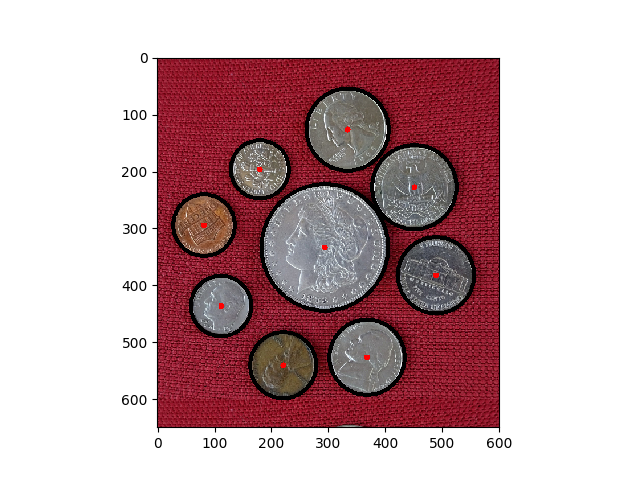

In [48]:
// Draw all contours
///
/// YOUR CODE HERE
///
image = imageCopy.clone();

for (int i = 0; i < keypoints.size(); i++) {
    // Get the i-th keypoint
    KeyPoint k = keypoints[i];
    
    // Extract the x and y coordinates of the keypoint
    Point keyPt;
    keyPt = k.pt;
    int x = (int)keyPt.x;
    int y = (int)keyPt.y;
    
   // Mark the center of the keypoint in RED
    circle(image, Point(x, y), 5, Scalar(0, 0, 255), -1);
    
    // Get the diameter of the keypoint (size)
    float diameter = k.size;
    
    // Calculate the radius of the keypoint
    int radius = (int)diameter / 2.0;
    
    // Mark the blob (keypoint) in GREEN
    circle(image, Point(x, y), radius, Scalar(0, 0, 0), 5);
}



plt::figure();
plt::imshow(image);
pltImg = displayImage(image);

pltImg

Let's only consider the outer contours.

<font style = "color:rgb(255,70,0)">
The original image will be reread, then the findContours parameters changed from 'RETR_LIST' to RETR_EXTERNAL. Finally, 'drawContours function will be used to draw all contours in green with a line thickness of 20 pixels.
</font>

In [49]:
// Remove the inner contours
// Display the result
///
/// YOUR CODE HERE
///

// Copy the original image
image = imageCopy.clone();  

// Find external contours
findContours(imageEroded, contours, hierarchy, RETR_EXTERNAL, CHAIN_APPROX_SIMPLE); 

// Draw the contours in green
drawContours(image, contours, -1, Scalar(0,255,0), 20);  

// Print the number of contours
cout << "Number of contours found = " << contours.size();  

Number of contours found = 1

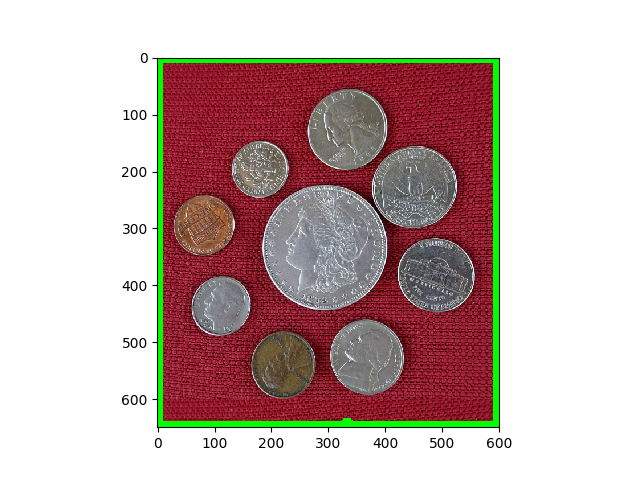

In [50]:
plt::figure();
plt::imshow(image);
pltImg = displayImage(image);
pltImg

So, we only need the inner contours. The easiest way to do that will be to remove the outer contour using area.

<font style = "color:rgb(255,70,0)">
To obtain the area and perimeter of each contour, I'll create two variables to store this information. I'll then use a loop with the 'findContours' function to iterate through the detected contours and print out these values.

Next, I will initialize variables to find and store the maximum contour area and its index,  then iterates through a list of contours, calculates their areas, and updates the maximum if a larger area is found. Finally I am going to print 
the maximum area among all the contours detected.
</font>

In [51]:
// Print area and perimeter of all contours
///
/// YOUR CODE HERE
///


// Decalring two variables to store area and perimeter of each contour
double area;       
double perimeter;  

// Find and process contours in the image with specific retrieval mode (RETR_LIST) 
// and no contour approximation (CHAIN_APPROX_NONE)
findContours(imageEroded, contours, hierarchy, RETR_LIST, CHAIN_APPROX_NONE);

// Loop through all the detected contours
for (size_t i = 0; i < contours.size(); i++) {
    
    // Calculate the area of the current contour
    area = contourArea(contours[i]);

    // Calculate the perimeter (arc length) of the current contour
    perimeter = arcLength(contours[i], true);

    // Print the area and perimeter of the current contour
    cout << "Contour " << i << " has an area of " << area << " and a perimeter of " << perimeter << std::endl;
}


Contour 0 has an area of 11041.5 and a perimeter of 400.517
Contour 1 has an area of 14069.5 and a perimeter of 452.801
Contour 2 has an area of 8982.5 and a perimeter of 370.032
Contour 3 has an area of 14446 and a perimeter of 454.558
Contour 4 has an area of 9348.5 and a perimeter of 366.375
Contour 5 has an area of 39038.5 and a perimeter of 746.708
Contour 6 has an area of 17576 and a perimeter of 500.014
Contour 7 has an area of 8268 and a perimeter of 343.99
Contour 8 has an area of 16307.5 and a perimeter of 483.772
Contour 9 has an area of 388715 and a perimeter of 2500.97


In [52]:
// Print maximum area of contour
// This will be the box that we want to remove
///
/// YOUR CODE HERE
///

 // Declaring a variable to store the maximum contour area with value of -1
int maxArea = -1;    

// Declaring a variable to store the index of the contour 
//with the maximum area with value of -1
int maxAreaIndex = -1;  

// Loop through all the detected contours
for (int i = 0; i < contours.size(); ++i) {
    // Calculate the area of the current contour
    double area = cv::contourArea(contours[i]);

    // Check if the current contour's area is greater than the current maximum area
    if (area > maxArea) {
        maxArea = area;         // Update the maximum area
        maxAreaIndex = i;       // Update the index of the contour with the maximum area
    }
}

// Print the maximum area of a contour found in the loop
cout << "Maximum area of contour = " << maxArea << endl;


Maximum area of contour = 388715


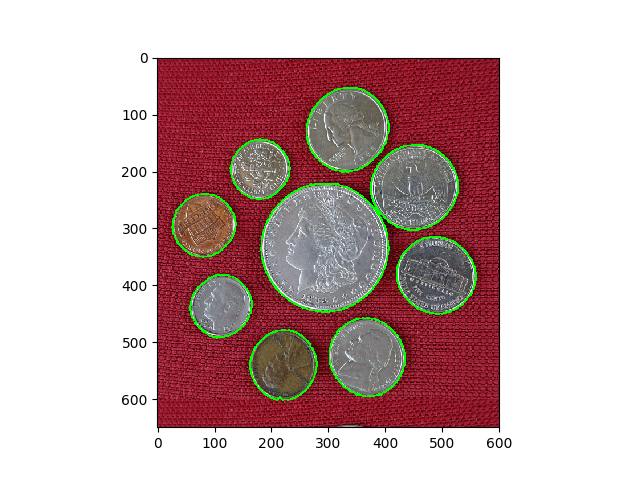

In [53]:
// Remove this contour and plot others
///
/// YOUR CODE HERE
///

// Check if a valid index for the contour with maximum area is found
if (maxAreaIndex >= 0) {
    // If found, remove the contour with the maximum area from the collection
    contours.erase(contours.begin() + maxAreaIndex);
}

// Copy the original image 
image = imageCopy.clone();

// Draw the remaining contours on the image in green with a line thickness of 2
drawContours(image, contours, -1, cv::Scalar(0, 255, 0), 2);

// Displaying the image
plt::figure();
plt::imshow(image);
pltImg = displayImage(image);
pltImg


<font style = "color:rgb(255,70,0)">

Previously, I did iteration over the keypoints, To extract the x and y coordinates, then applied circle functions, which gave me perfect circles.  I will use the same method with minor adjustment to the color values.

</font>

In [54]:
// Fit circles on coins
///
/// YOUR CODE HERE
///

// Iterate through keypoints in a list
for (int i = 0; i < keypoints.size(); i++) {
    KeyPoint k = keypoints[i];
    Point keyPt;
    keyPt = k.pt;
    int x = (int)keyPt.x;
    int y = (int)keyPt.y;
    
    // Mark the center of the keypoint in RED
    circle(image, Point(x, y), 5, Scalar(0, 0, 255), -1);
    
    // Get the radius of a coin (diameter divided by 2)
    diameter = k.size;
    int radius = (int)diameter / 2.0;
    
    // Mark the blob (keypoint) in BLUE with a thicker line (thickness 8)
    circle(image, Point(x, y), radius, Scalar(255, 0, 0), 8);
}


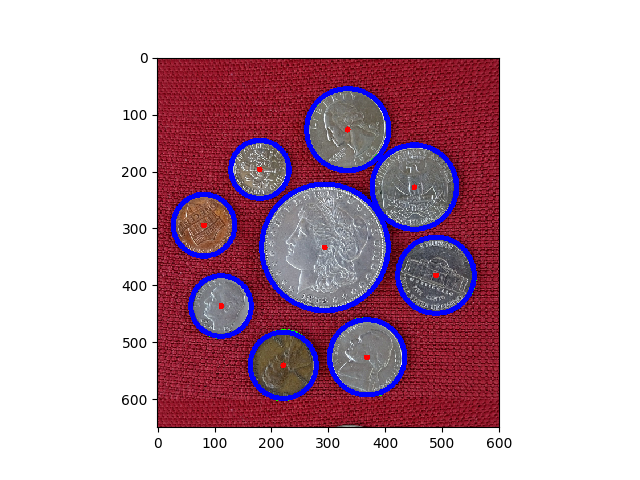

In [55]:
plt::figure();
plt::imshow(image);
pltImg = displayImage(image);
pltImg

# <font style = "color:rgb(50,120,229)">Assignment Part - B</font>

**Follow the same steps as provided in Assignment Part - A**

## <font style = "color:rgb(50,120,229)"> Step 1: Read Image</font>

In [56]:
// Image path
imagePath = DATA_PATH + "images/CoinsB.png";
// Read image
// Store it in variable image
///
/// YOUR CODE HERE
///
image = cv::imread(imagePath, cv::IMREAD_COLOR);
imageCopy = image.clone();

## <font style = "color:rgb(50,120,229)">Step 2.1: Convert Image to Grayscale</font>

In [57]:
// Convert image to grayscale
// Store it in the variable imageGray
///
/// YOUR CODE HERE
///
cvtColor(imageCopy, imageGray, COLOR_BGR2GRAY);

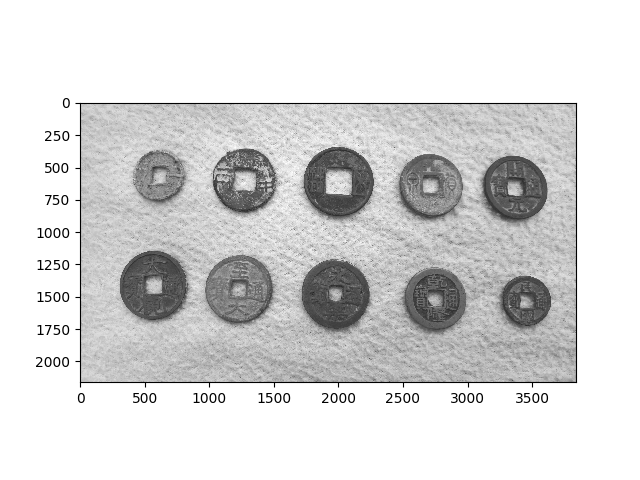

In [58]:
// Display image
plt::figure();
plt::imshow(imageGray);
pltImg = displayImage(imageGray);
pltImg

## <font style = "color:rgb(50,120,229)">Step 2.2: Split Image into R,G,B Channels</font>

In [59]:
// Split cell into channels
// Store them in variables imageB, imageG, imageR
///
/// YOUR CODE HERE
///

std::vector<cv::Mat> channels2;;
split(image, channels2);

// Storing each channel to tis repected variable

imageB = channels2[0];  // Blue channel
imageG = channels2[1];  // Green channel
imageR = channels2[2];  // Red channel

@0x7fc1d26408d8

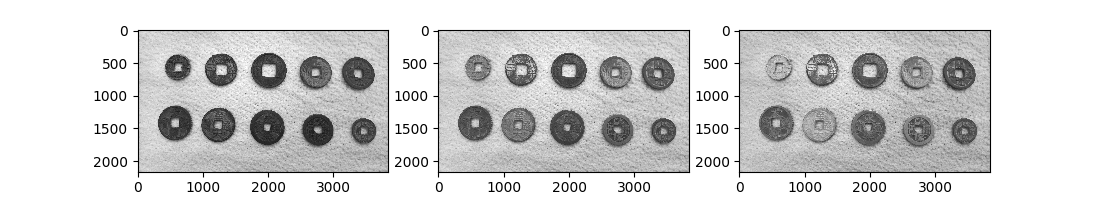

In [60]:
plt::figure_size(1100,200);
plt::subplot(1,3,1);
plt::imshow(imageB);
pltImg = displayImage(imageB);
plt::subplot(1,3,2);
plt::imshow(imageG);
pltImg = displayImage(imageG);
plt::subplot(1,3,3);
plt::imshow(imageR);
pltImg = displayImage(imageR)

## <font style = "color:rgb(50,120,229)">Step 3.1: Perform Thresholding</font>

You will have to carry out this step with different threshold values to see which one suits you the most. Do not remove those intermediate images and make sure to document your findings.

<font color = green> I'll use the OpenCV function 'threshold' for this task, beginning with the 'THRESH_BINARY' thresholding method."</font>

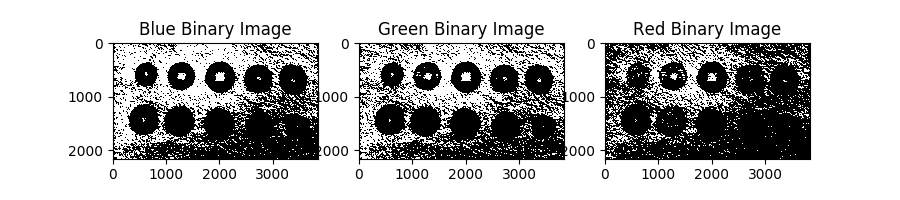

In [61]:
///
/// YOUR CODE HERE
///

// Create three empty Mat variables for binary images: 

binaryImgBlue;
binaryImgGreen;
binaryImgRed;

// Apply thresholding to the blue channel of the input image 'imageB'
threshold(imageB, binaryImgBlue, 200, 255, THRESH_BINARY);

// Apply thresholding to the blue channel of the input image 'imageG'
threshold(imageG, binaryImgGreen, 200, 255, THRESH_BINARY);

// Apply thresholding to the blue channel of the input image 'imageR'
threshold(imageR, binaryImgRed, 200, 255, THRESH_BINARY);


plt::figure_size(900,200);


plt::subplot(1,3,1);
plt::title("Blue Binary Image");
plt::imshow(binaryImgBlue);
pltImg = displayImage(binaryImgBlue);


plt::subplot(1,3,2);
plt::title("Green Binary Image");
plt::imshow(binaryImgGreen);
pltImg = displayImage(binaryImgGreen);


plt::subplot(1,3,3);
plt::title("Red Binary Image");
plt::imshow(binaryImgRed);
pltImg = displayImage(binaryImgRed);
pltImg

<font color = green> I will keep the THRESSH_BINARY method as the blobs meaning no need for bitwise operation. Also I'm going to decrease the tresh value to reduce the noise until I get the intendent result."</font>

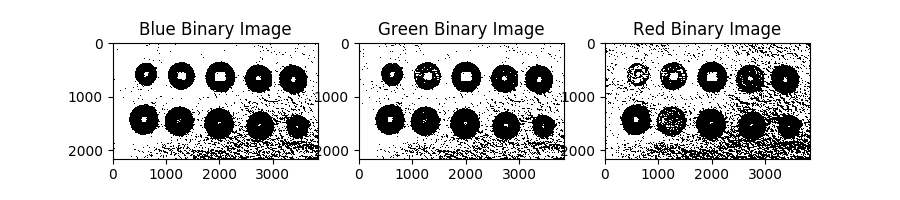

In [62]:
threshold(imageB, binaryImgBlue, 180, 255, THRESH_BINARY);
threshold(imageG, binaryImgGreen, 180, 255, THRESH_BINARY);
threshold(imageR, binaryImgRed, 180, 255, THRESH_BINARY);
plt::figure_size(900,200);


plt::subplot(1,3,1);
plt::title("Blue Binary Image");
plt::imshow(binaryImgBlue);
pltImg = displayImage(binaryImgBlue);


plt::subplot(1,3,2);
plt::title("Green Binary Image");
plt::imshow(binaryImgGreen);
pltImg = displayImage(binaryImgGreen);


plt::subplot(1,3,3);
plt::title("Red Binary Image");
plt::imshow(binaryImgRed);
pltImg = displayImage(binaryImgRed);
pltImg

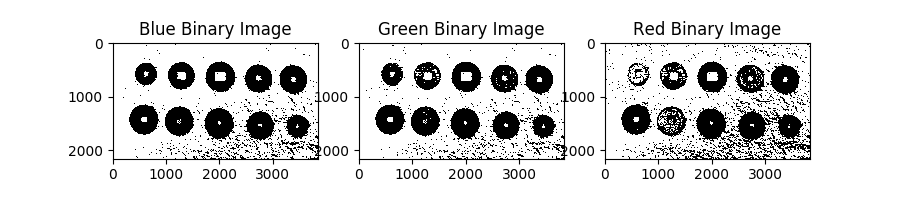

In [63]:
threshold(imageB, binaryImgBlue, 170, 255, THRESH_BINARY);
threshold(imageG, binaryImgGreen, 170, 255, THRESH_BINARY);
threshold(imageR, binaryImgRed, 170, 255, THRESH_BINARY);
plt::figure_size(900,200);


plt::subplot(1,3,1);
plt::title("Blue Binary Image");
plt::imshow(binaryImgBlue);
pltImg = displayImage(binaryImgBlue);


plt::subplot(1,3,2);
plt::title("Green Binary Image");
plt::imshow(binaryImgGreen);
pltImg = displayImage(binaryImgGreen);


plt::subplot(1,3,3);
plt::title("Red Binary Image");
plt::imshow(binaryImgRed);
pltImg = displayImage(binaryImgRed);
pltImg

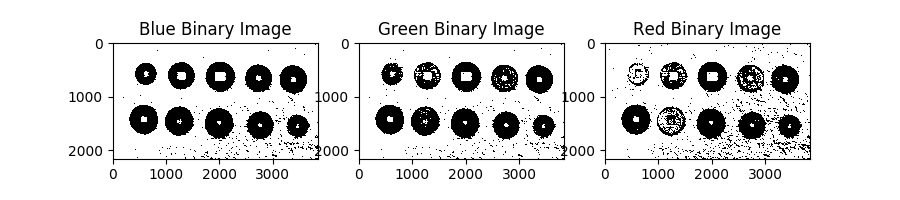

In [64]:
threshold(imageB, binaryImgBlue, 160, 255, THRESH_BINARY);
threshold(imageG, binaryImgGreen, 160, 255, THRESH_BINARY);
threshold(imageR, binaryImgRed, 160, 255, THRESH_BINARY);
plt::figure_size(900,200);


plt::subplot(1,3,1);
plt::title("Blue Binary Image");
plt::imshow(binaryImgBlue);
pltImg = displayImage(binaryImgBlue);


plt::subplot(1,3,2);
plt::title("Green Binary Image");
plt::imshow(binaryImgGreen);
pltImg = displayImage(binaryImgGreen);


plt::subplot(1,3,3);
plt::title("Red Binary Image");
plt::imshow(binaryImgRed);
pltImg = displayImage(binaryImgRed);
pltImg

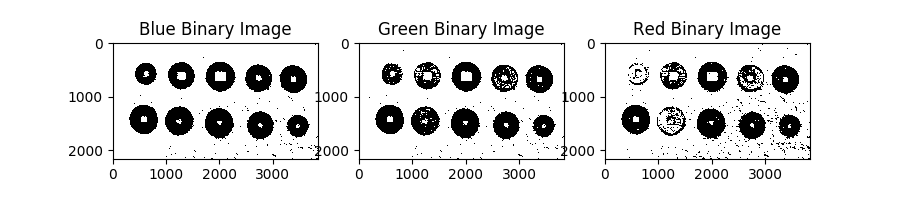

In [65]:
threshold(imageB, binaryImgBlue, 150, 255, THRESH_BINARY);
threshold(imageG, binaryImgGreen, 150, 255, THRESH_BINARY);
threshold(imageR, binaryImgRed, 150, 255, THRESH_BINARY);
plt::figure_size(900,200);


plt::subplot(1,3,1);
plt::title("Blue Binary Image");
plt::imshow(binaryImgBlue);
pltImg = displayImage(binaryImgBlue);


plt::subplot(1,3,2);
plt::title("Green Binary Image");
plt::imshow(binaryImgGreen);
pltImg = displayImage(binaryImgGreen);


plt::subplot(1,3,3);
plt::title("Red Binary Image");
plt::imshow(binaryImgRed);
pltImg = displayImage(binaryImgRed);
pltImg

<font color = green> Threshold 150 is good enouh to perform Morphological operations. Next I'm saving green image since I believe that it is the less noisy one, then I'm goingt to display the image. "</font>

In [66]:
dst = binaryImgGreen.clone();

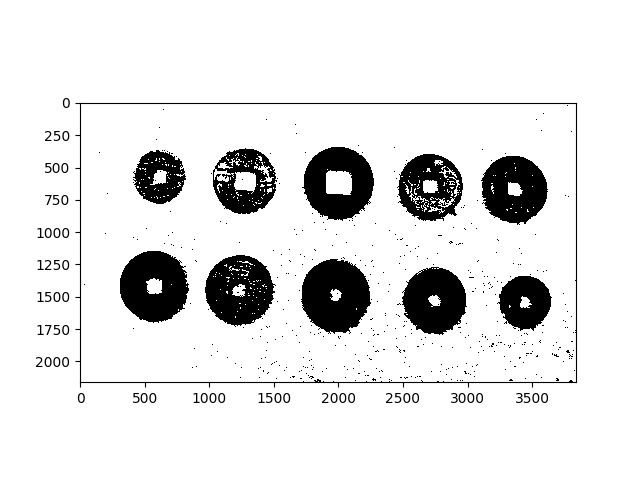

In [67]:
plt::figure();
plt::imshow(dst);
pltImg = displayImage(dst);
pltImg

## <font style = "color:rgb(50,120,229)">Step 3.2: Perform morphological operations</font>

You will have to carry out this step with different kernel size, kernel shape and morphological operations to see which one (or more) suits you the most. Do not remove those intermediate images and make sure to document your findings.

<font color = green> Initially I have to create an empty image to store the erosion operation. Then I will iterate and change the parameters and element shape to get the intendent result. "</font>

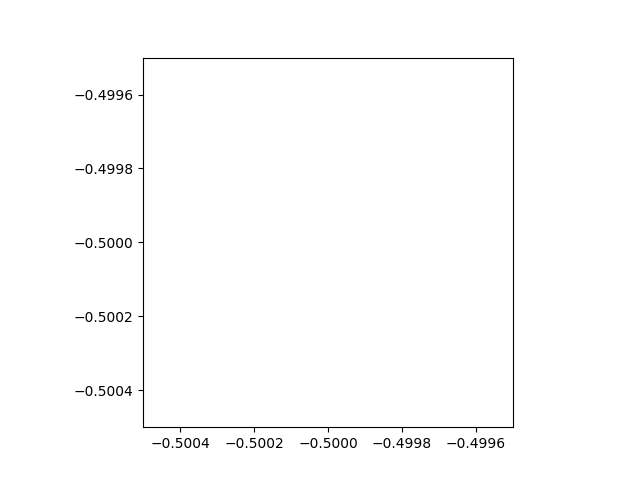

In [68]:
///
/// YOUR CODE HERE
///
Mat emptyImage;
plt::figure();
plt::title("");
plt::imshow(emptyImage);
pltImg = displayImage(emptyImage);
pltImg 

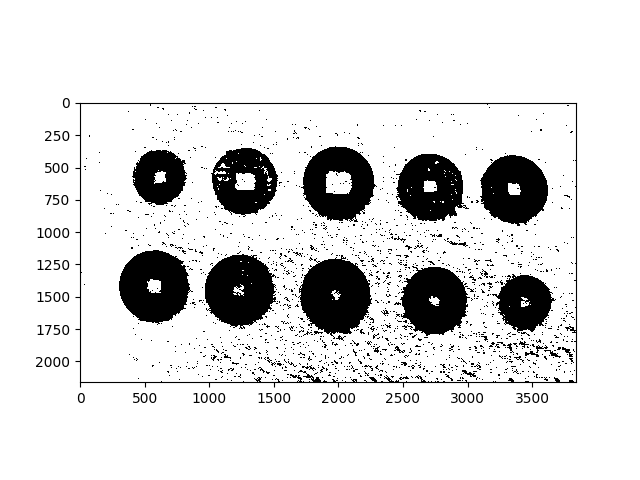

In [69]:
kernelSize = 1;
element = getStructuringElement(MORPH_RECT, Size(2*kernelSize+1, 2*kernelSize+1),
                                Point(kernelSize, kernelSize));


morphImage = emptyImage.clone();
erode(dst, morphImage, element, Point(-1,-1),3);

dst1 = morphImage.clone();

plt::figure();
plt::title("");
plt::imshow(dst1);
pltImg = displayImage(dst1);
pltImg     

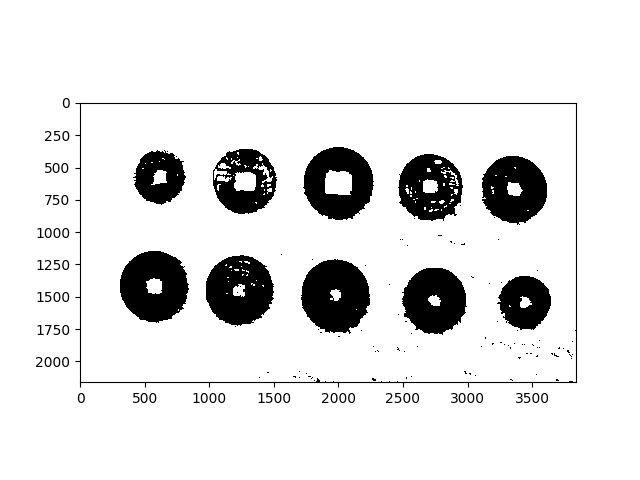

In [70]:
kernelSize = 5;
element = getStructuringElement(MORPH_ELLIPSE, Size(2*kernelSize+1, 2*kernelSize+1),
                                Point(kernelSize, kernelSize));

morphImage = emptyImage.clone();
dilate(dst1, morphImage, element, Point(-1,-1),1);

dst2 = morphImage.clone();
plt::figure();
plt::title("");
plt::imshow(dst2);
pltImg = displayImage(dst2);
pltImg   

<font color = green> 
Few of the blobs are getting more noisy with more white speckles, which means that I'm need to use erosion to remove them. Then I can perform dilation to remove the black speckles in the background. This approach will be itereated until the I get the result I need. 

<p> Nex iteration will be common to the the assignment A, meaning no additional documentations will be added. 

</font>

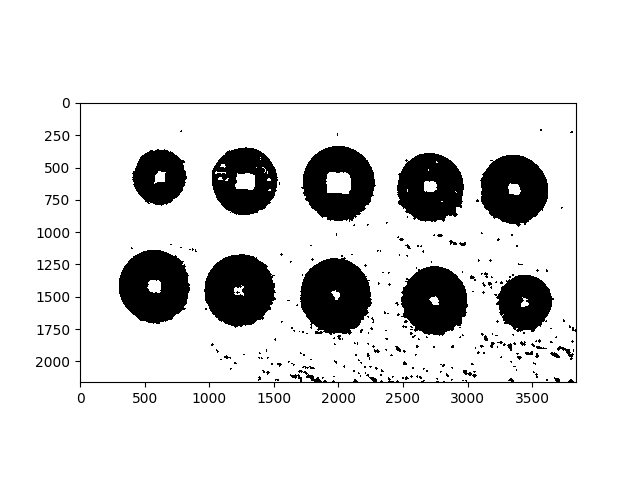

In [71]:
kernelSize = 3;
element = getStructuringElement(MORPH_CROSS, Size(2*kernelSize+1, 2*kernelSize+1),
                                Point(kernelSize, kernelSize));

morphImage = emptyImage.clone();
erode(dst2, morphImage, element, Point(-1,-1),3);

dst3 = morphImage.clone();
plt::figure();
plt::title("");
plt::imshow(dst3);
pltImg = displayImage(dst3);
pltImg 

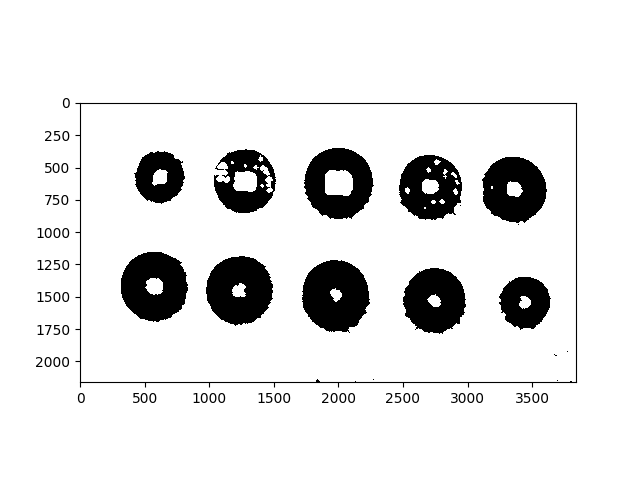

In [72]:
kernelSize = 5;
element = getStructuringElement(MORPH_CROSS, Size(2*kernelSize+1, 2*kernelSize+1),
                                Point(kernelSize, kernelSize));

morphImage = emptyImage.clone();
dilate(dst3, morphImage, element, Point(-1,-1),3);

dst4 = morphImage.clone();
plt::figure();
plt::title("");
plt::imshow(dst4);
pltImg = displayImage(dst4);
pltImg  

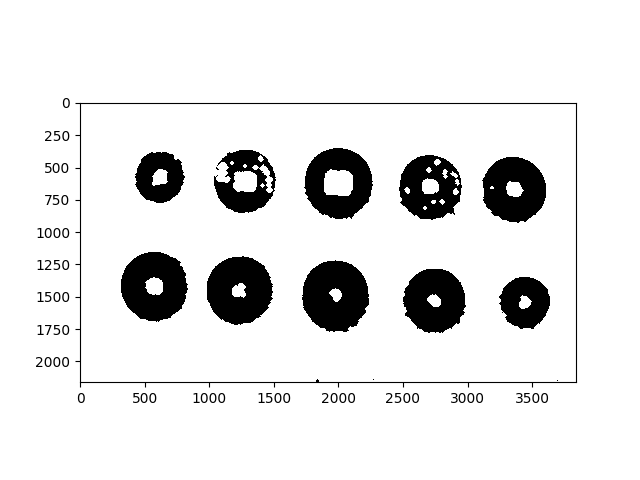

In [73]:
kernelSize = 1;
element = getStructuringElement(MORPH_CROSS, Size(2*kernelSize+1, 2*kernelSize+1),
                                Point(kernelSize, kernelSize));

morphImage = emptyImage.clone();
dilate(dst4, morphImage, element, Point(-1,-1),2);

dst5 = morphImage.clone();
plt::figure();
plt::title("");
plt::imshow(dst5);
pltImg = displayImage(dst5);
pltImg  

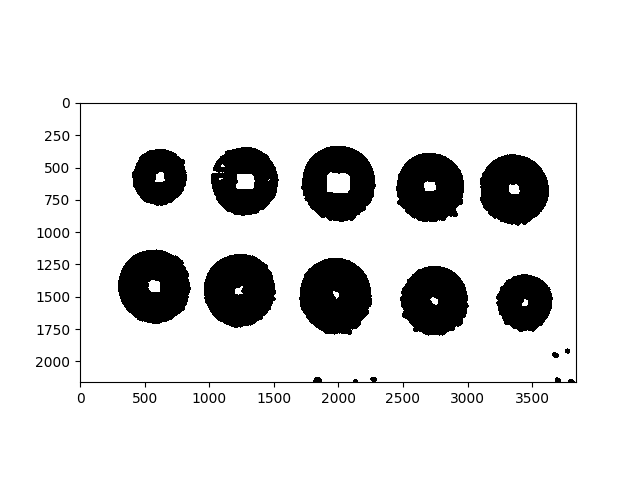

In [74]:
kernelSize = 10;
element = getStructuringElement(MORPH_ELLIPSE, Size(2*kernelSize+1, 2*kernelSize+1),
                                Point(kernelSize, kernelSize));

morphImage = emptyImage.clone();
erode(dst5, morphImage, element, Point(-1,-1),2);

dst6 = morphImage.clone();
plt::figure();
plt::title("");
plt::imshow(dst6);
pltImg = displayImage(dst6);
pltImg  

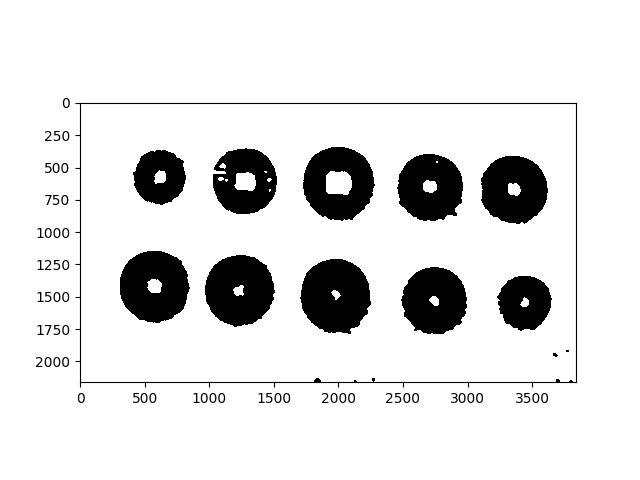

In [75]:
kernelSize = 5;
element = getStructuringElement(MORPH_CROSS, Size(2*kernelSize+1, 2*kernelSize+1),
                                Point(kernelSize, kernelSize));

morphImage = emptyImage.clone();
dilate(dst6, morphImage, element, Point(-1,-1),2);

Mat dst7 = morphImage.clone();
plt::figure();
plt::title("");
plt::imshow(dst7);
pltImg = displayImage(dst7);
pltImg  

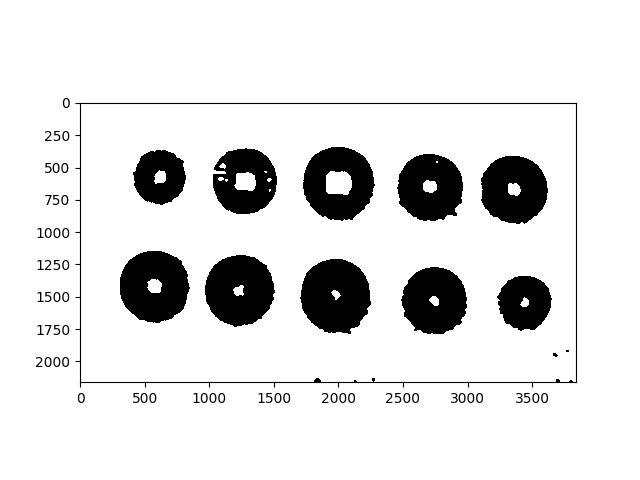

In [76]:
kernelSize = 9;
element = getStructuringElement(MORPH_CROSS, Size(2*kernelSize+1, 2*kernelSize+1),
                                Point(kernelSize, kernelSize));

morphImage = emptyImage.clone();
erode(dst7, morphImage, element, Point(-1,-1),2);

Mat dst8 = morphImage.clone();
plt::figure();
plt::title("");
plt::imshow(dst8);
pltImg = displayImage(dst7);
pltImg 

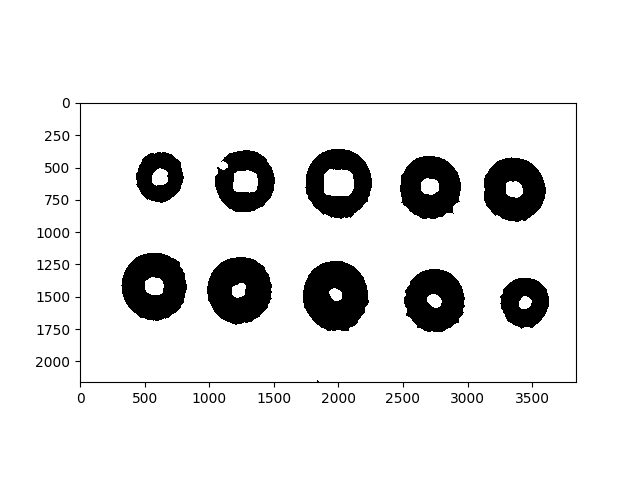

In [77]:
kernelSize = 3;
element = getStructuringElement(MORPH_ELLIPSE, Size(2*kernelSize+1, 2*kernelSize+1),
                                Point(kernelSize, kernelSize));

morphImage = emptyImage.clone();
dilate(dst8, morphImage, element, Point(-1,-1),11);

Mat dst9 = morphImage.clone();
plt::figure();
plt::title("");
plt::imshow(dst9);
pltImg = displayImage(dst9);
pltImg 

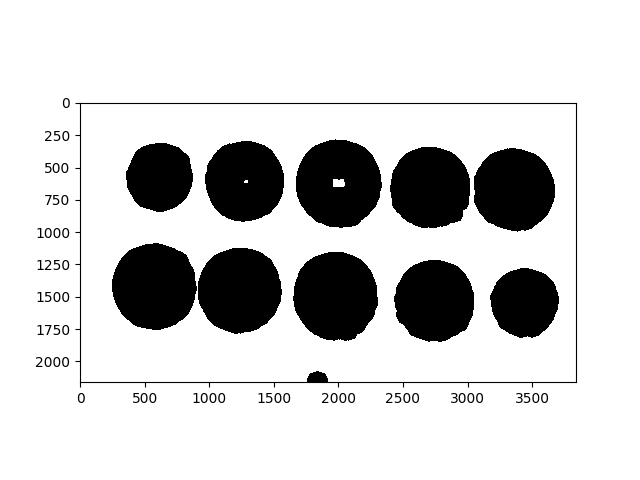

In [78]:
kernelSize = 4;
element = getStructuringElement(MORPH_ELLIPSE, Size(2*kernelSize+1, 2*kernelSize+1),
                                Point(kernelSize, kernelSize));

morphImage = emptyImage.clone();
erode(dst9, morphImage, element, Point(-1,-1),18);
 
Mat dst10 = morphImage.clone();
plt::figure();
plt::title("");
plt::imshow(dst10);
pltImg = displayImage(dst10);
pltImg 

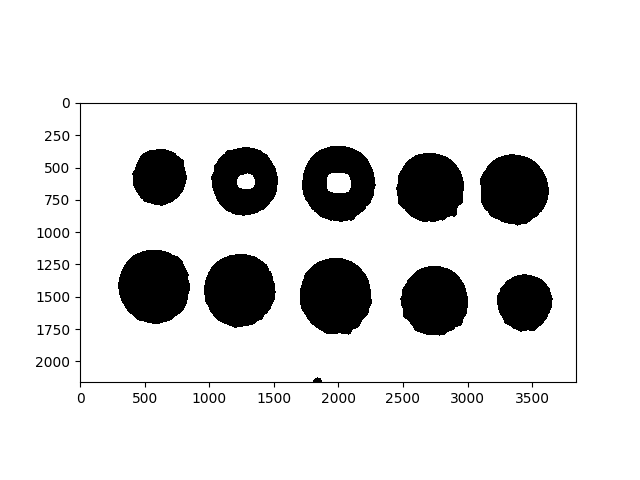

In [79]:
kernelSize = 4;
element = getStructuringElement(MORPH_ELLIPSE, Size(2*kernelSize+1, 2*kernelSize+1),
                                Point(kernelSize, kernelSize));

morphImage = emptyImage.clone();
dilate(dst10, morphImage, element, Point(-1,-1),12);

Mat dst11 = morphImage.clone();
plt::figure();
plt::title("");
plt::imshow(dst11);
pltImg = displayImage(dst11);
pltImg 

In [80]:
// Saving the final binary image in the decalred variable 'dst' to be used for
// the SimpleBlobDetector
dst = dst11.clone();

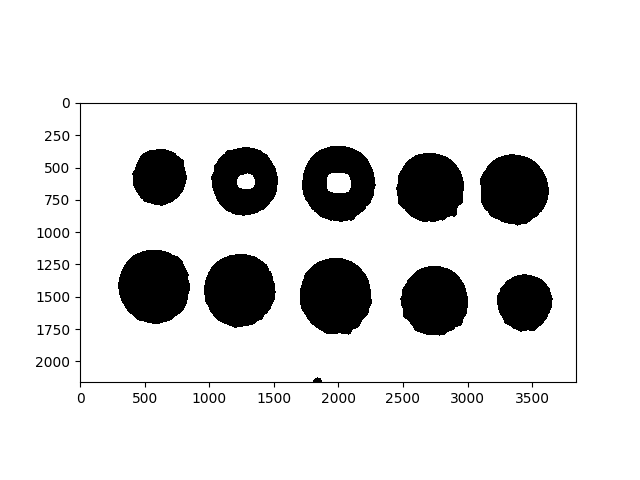

In [81]:
///
/// YOUR CODE HERE
///
plt::figure();
plt::title("");
plt::imshow(dst);
pltImg = displayImage(dst);
pltImg 

## <font style = "color:rgb(50,120,229)">Step 4.1: Create SimpleBlobDetector</font>

In [82]:
// Setup SimpleBlobDetector parameters.

params.blobColor = 0;

params.minDistBetweenBlobs = 2;

// Filter by Area
params.filterByArea = false;

// Filter by Circularity
params.filterByCircularity = true;
params.minCircularity = 0.8;

// Filter by Convexity
params.filterByConvexity = true;
params.minConvexity = 0.8;

// Filter by Inertia
params.filterByInertia = true;
params.minInertiaRatio = 0.8;

In [83]:
// Set up detector with params
detector = SimpleBlobDetector::create(params);

## <font style = "color:rgb(50,120,229)">Step 4.2: Detect Coins</font>

### <font style = "color:rgb(8,133,37)">Hints</font>
Use **`detector->detect(image,keypoints)`** to detect the blobs (coins). The output of the function is a list of **keypoints** where each keypoint is unique for each blob.

Print the number of coins detected as well.

In [84]:
// Detect blobs
///
/// YOUR CODE HERE
///

std::vector<KeyPoint> keypoints_1;
detector->detect(dst,keypoints_1);

In [85]:
// Print number of coins detected
///
/// YOUR CODE HERE
///

cout << "Number of contours found = " << keypoints_1.size();

Number of contours found = 8

**Note that we were able to detect 8 coins. So, that's your benchmark.**

## <font style = "color:rgb(50,120,229)">Step 4.3: Display the detected coins on original image</font>

Make sure to mark the center of the blobs as well. **Use only the functions discussed in Image Annotation section in Week 1**

### <font style = "color:rgb(8,133,37)">Hints</font>
You can extract the coordinates of the center and the diameter of a blob using **`k.pt`** and **`k.size`** where `k` is a keypoint.

In [86]:
// Mark coins using image annotation concepts we have studied so far
///
/// YOUR CODE HERE
///

image = imageCopy.clone();

for (int i=0; i < keypoints_1.size(); i++){
    KeyPoint k = keypoints_1[i];
    Point keyPt;
    keyPt = k.pt;
    x=(int)keyPt.x;
    y=(int)keyPt.y;
    // Mark center in BLACK
    circle(image,Point(x,y),10,Scalar(0,0,0),-1);
    // Get radius of coin
    diameter = k.size;
    radius = (int)diameter/2.0;
    // Mark blob in GREEN
    circle(image, Point(x,y),radius,Scalar(0,0,255),10);
}

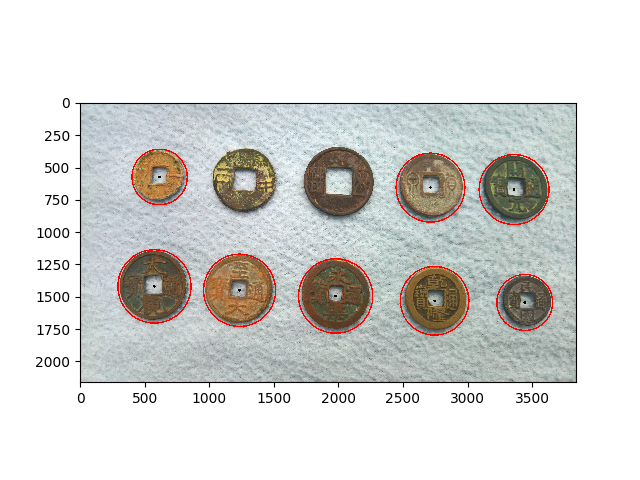

In [87]:
///
/// YOUR CODE HERE
///


plt::figure();
plt::imshow(image);
pltImg = displayImage(image);

pltImg

## <font style = "color:rgb(50,120,229)">Step 4.4: Perform Connected Component Analysis</font>

In the final step, perform Connected Component Analysis (CCA) on the binary image to find out the number of connected components. Do you think we can use CCA to calculate number of coins? Why/why not?

In [88]:
// # Find connected components
///
/// YOUR CODE HERE
///

imLabels;
connectedComponents(dst, imLabels);
colorMap = displayConnectedComponents(imLabels);

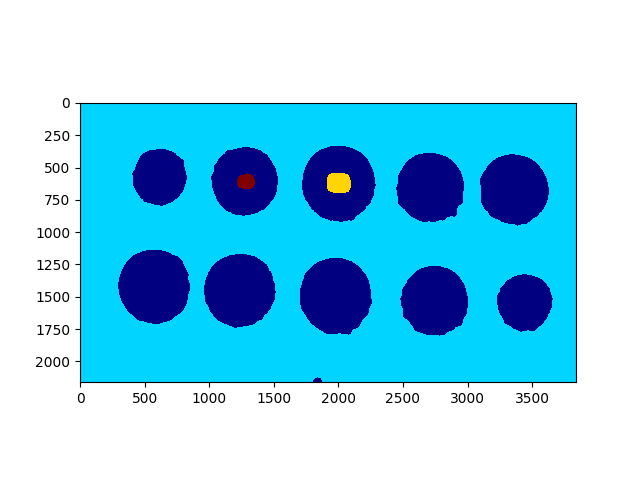

In [89]:
///
/// YOUR CODE HERE
///


plt::figure();
plt::imshow(colorMap);
pltImg = displayImage(colorMap);

pltImg

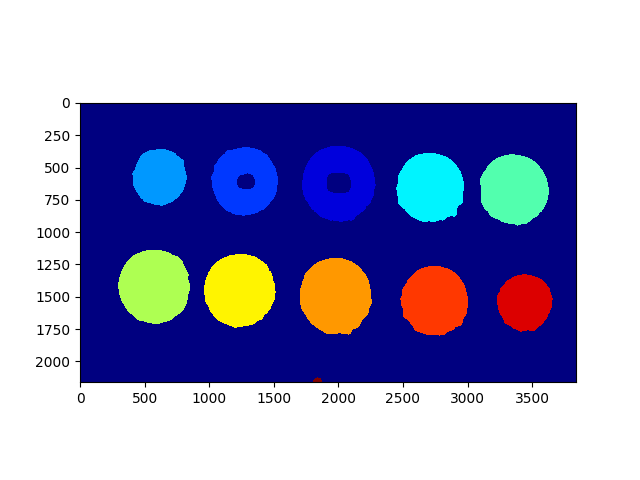

In [90]:
Mat imThresh;
threshold(dst, imThresh, 40, 255, THRESH_BINARY_INV);

// Find connected components
imLabels;
connectedComponents(imThresh, imLabels);
colorMap = displayConnectedComponents(imLabels);

plt::figure();
plt::imshow(colorMap);
pltImg = displayImage(colorMap);

pltImg

## <font style = "color:rgb(50,120,229)">Step 4.5: Detect coins using Contour Detection</font>

In the final step, perform Contour Detection on the binary image to find out the number of coins.

In [91]:
// Find all contours in the image
///
/// YOUR CODE HERE
///

findContours(dst, contours, hierarchy, RETR_LIST, CHAIN_APPROX_SIMPLE);

In [92]:
// Print the number of contours found
///
/// YOUR CODE HERE
///
cout << "Number of contours found = " << contours.size();

Number of contours found = 13

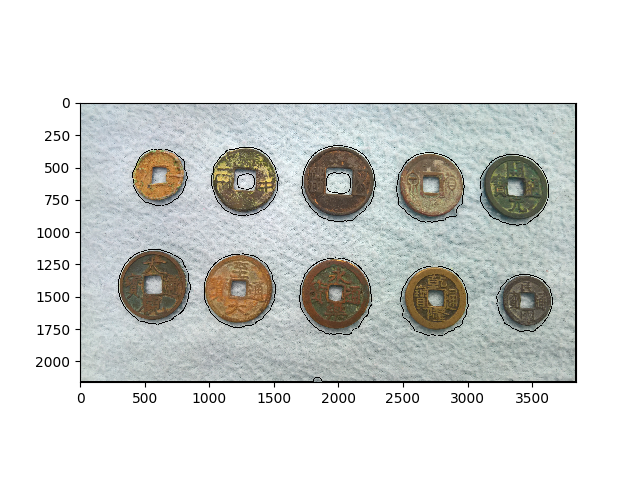

In [93]:
// Draw all contours
///
/// YOUR CODE HERE
///


image = imageCopy.clone();
drawContours(image, contours, -1, Scalar(0,0,0), 5);
plt::figure();
plt::imshow(image);
pltImg = displayImage(image);

pltImg


Let's only consider the outer contours.

In [94]:
// Remove the inner contours
// Display the result
///
/// YOUR CODE HERE
///

findContours(dst, contours, hierarchy, RETR_EXTERNAL, CHAIN_APPROX_SIMPLE);
image = imageCopy.clone();
drawContours(image, contours, -1, Scalar(0,255,0), 30);

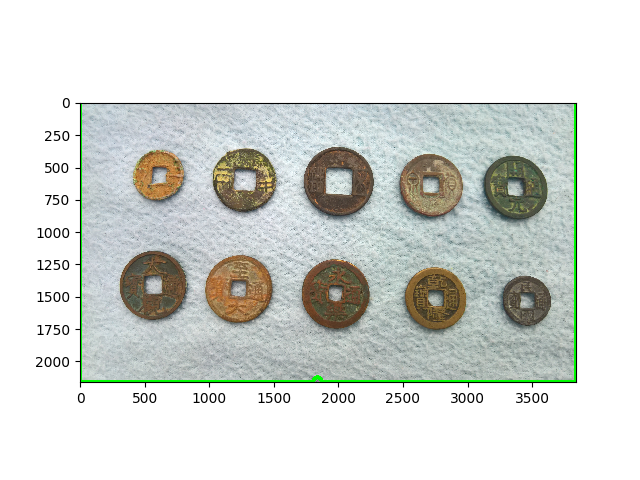

In [95]:
plt::figure();
plt::imshow(image);
pltImg = displayImage(image);
pltImg

What do you think went wrong? As we can see, the outer box was detected as a contour and with respect to it, all other contours are internal and that's why they were not detected. How do we remove that? Let's see if we can use area of contours here.

In [96]:
// Print area and perimeter of all contours
///
/// YOUR CODE HERE
///

findContours(dst, contours, hierarchy, RETR_LIST, CHAIN_APPROX_NONE);

for (size_t i = 0; i < contours.size(); i++) {
    area = contourArea(contours[i]);
    perimeter = arcLength(contours[i], true);
    cout << "Contour " << i << " has an area of " << area << " and a perimeter of " << perimeter << std::endl;
    
}

Contour 0 has an area of 147489 and a perimeter of 1464.5
Contour 1 has an area of 221028 and a perimeter of 1797.5
Contour 2 has an area of 260049 and a perimeter of 1945.46
Contour 3 has an area of 246536 and a perimeter of 1881.42
Contour 4 has an area of 251904 and a perimeter of 1899.38
Contour 5 has an area of 13213.5 and a perimeter of 443.806
Contour 6 has an area of 25751 and a perimeter of 623.99
Contour 7 has an area of 229272 and a perimeter of 1810.65
Contour 8 has an area of 224074 and a perimeter of 1822.39
Contour 9 has an area of 144256 and a perimeter of 1451.29
Contour 10 has an area of 214969 and a perimeter of 1755.84
Contour 11 has an area of 261952 and a perimeter of 1939.61
Contour 12 has an area of 8.2865e+06 and a perimeter of 12045.4


In [97]:
// Print maximum area of contour
// This will be the box that we want to remove
///
/// YOUR CODE HERE
///


for (int i = 0; i < contours.size(); ++i) {
        double area = cv::contourArea(contours[i]);
        if (area > maxArea) {
            maxArea = area;
            maxAreaIndex = i;
    }
}

cout << "Maximum contour area: " << maxArea << std::endl;

Maximum contour area: 8286505


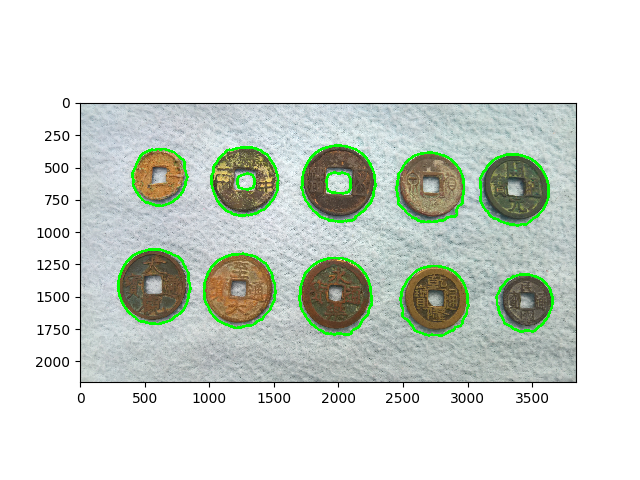

In [98]:
// Remove this contour and plot others
///
/// YOUR CODE HERE
///


if (maxAreaIndex >= 0) {
    contours.erase(contours.begin() + maxAreaIndex);
}

image = imageCopy.clone();

// Draw the remaining contours on the new image
drawContours(image, contours, -1, cv::Scalar(0, 255, 0), 20);

plt::figure();
plt::imshow(image);
pltImg = displayImage(image);
pltImg

Now, we have to remove the internal contours. Again here we can use area or perimeter.

In [99]:
// Print area and perimeter of all contours
///
/// YOUR CODE HERE
///

for (size_t i = 0; i < contours.size(); i++) {
    area = contourArea(contours[i]);
    perimeter = arcLength(contours[i], true);
    cout << "Contour " << i << " has an area of " << area << " and a perimeter of " << perimeter << std::endl;
    
}

Contour 0 has an area of 147489 and a perimeter of 1464.5
Contour 1 has an area of 221028 and a perimeter of 1797.5
Contour 2 has an area of 260049 and a perimeter of 1945.46
Contour 3 has an area of 246536 and a perimeter of 1881.42
Contour 4 has an area of 251904 and a perimeter of 1899.38
Contour 5 has an area of 13213.5 and a perimeter of 443.806
Contour 6 has an area of 25751 and a perimeter of 623.99
Contour 7 has an area of 229272 and a perimeter of 1810.65
Contour 8 has an area of 224074 and a perimeter of 1822.39
Contour 9 has an area of 144256 and a perimeter of 1451.29
Contour 10 has an area of 214969 and a perimeter of 1755.84
Contour 11 has an area of 261952 and a perimeter of 1939.61


Notice carefully that there are 2 contours that have area smaller than others. In our case, those are contours 6 and 7. Let's remove them.

In [100]:
// Remove contours
///
/// YOUR CODE HERE
///


for (size_t i = 0; i < contours.size(); i++) {
    area = contourArea(contours[i]);
    perimeter = arcLength(contours[i], true);
    cout << "Contour " << i << " has an area of " << area << " and a perimeter of " << perimeter << std::endl;

    // Check if the area meets the specified conditions
    if (area == 25751 || area == 13213.5) {
        contours.erase(contours.begin() + i); // Remove the contour at index i
        i--; // Decrement i to account for the removed element
    }
}

Contour 0 has an area of 147489 and a perimeter of 1464.5
Contour 1 has an area of 221028 and a perimeter of 1797.5
Contour 2 has an area of 260049 and a perimeter of 1945.46
Contour 3 has an area of 246536 and a perimeter of 1881.42
Contour 4 has an area of 251904 and a perimeter of 1899.38
Contour 5 has an area of 13213.5 and a perimeter of 443.806
Contour 5 has an area of 25751 and a perimeter of 623.99
Contour 5 has an area of 229272 and a perimeter of 1810.65
Contour 6 has an area of 224074 and a perimeter of 1822.39
Contour 7 has an area of 144256 and a perimeter of 1451.29
Contour 8 has an area of 214969 and a perimeter of 1755.84
Contour 9 has an area of 261952 and a perimeter of 1939.61


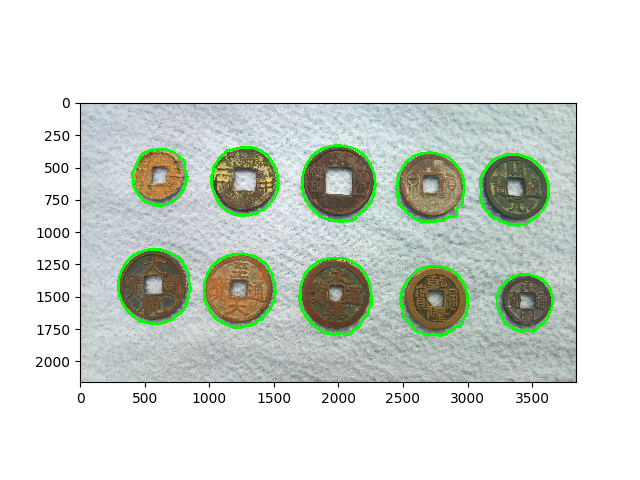

In [101]:
image = imageCopy.clone();

drawContours(image, contours, -1, cv::Scalar(0, 255, 0), 20);

plt::figure();
plt::imshow(image);
pltImg = displayImage(image);
pltImg


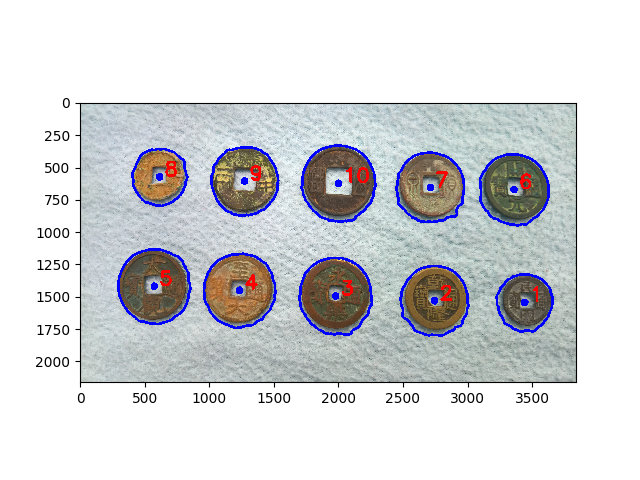

In [102]:
image = imageCopy.clone();

Moments M;

for (int i=0; i < contours.size(); i++){
    
    M = moments(contours[i]);
    x = int(M.m10/double(M.m00));
    y = int(M.m01/double(M.m00));
    
    
   
    // Mark center in BLACK
    circle(image,Point(x,y),30,Scalar(255,0,0),-1);  

    putText(image, to_string(i+1), Point(x+40,y-10), FONT_HERSHEY_SIMPLEX, 5, Scalar(0,0,255),20);
    
    drawContours(image, contours, -1, Scalar(255, 0, 0), 20);
}





plt::figure();
plt::imshow(image);
pltImg = displayImage(image);
pltImg

In [103]:
// Fit circles on coins
///
/// YOUR CODE HERE
///

image = imageCopy.clone();


for (int i = 0; i < contours.size(); i++) {
    M = moments(contours[i]);
    x = int(M.m10 / double(M.m00));
    y = int(M.m01 / double(M.m00));

    // Find the minimum enclosing circle
    Point2f center;
    float radius;
    minEnclosingCircle(contours[i], center, radius);

    // Draw the enclosing circle
    circle(image, center, int(radius), Scalar(255, 0, 0), 1, LINE_AA);

    // Mark the contour center in black
    circle(image, Point(x, y), 30, Scalar(0, 0, 255), -1);
    circle(image, Point(x, y), radius, Scalar(255, 0, 0), 20, LINE_AA);

    drawContours(image, contours, -1, Scalar(255, 0, 0), 1);
}

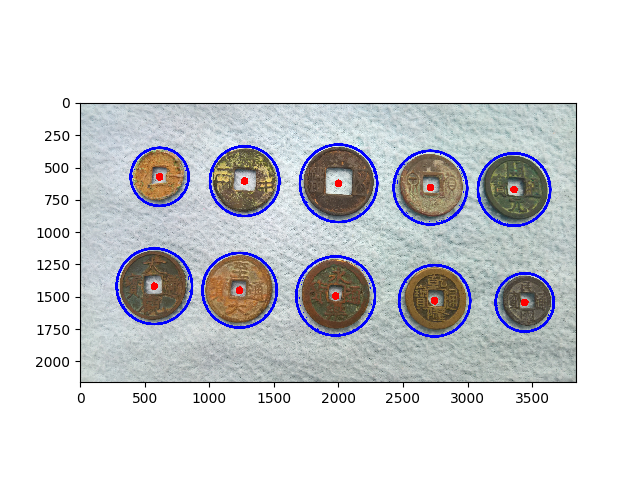

In [104]:
plt::figure();
plt::imshow(image);
pltImg = displayImage(image);
pltImg

😃 Cheers!
